An Analysis of Survivor CBS Players Data

Natalie Goodwin

Introduction

Survivor CBS is a reality gameshow where 20 castaways are put on an island and must survive 39 days in the harsh conditions of their physical and social environment. Every few days, the contestants must compete in challenges and vote someone out of their tribe until there are 3 players remaining. These 3 finalists must then convince the individuals they voted out why they should be the winner of the title of Sole Survivor and $1 million dollars. On the surface, this game is extremely physically demanding, but the focus has evolved to be even more stratetically and socially demanding. Survivor is also unique in that each of your strengths can be viewed as a reason to vote you out and each of your weaknesses can be a reason to keep you in the game, yet you need to be a strong enough player to keep yourself in the game. In the game where perception is reality, there are many layers that play a part in the discourse of the game. 

While this is just a reality show, Survivor is a microcosm of our society. From these games and players, we can learn more about human behavior and the social dynamics that play a part in our own communities and interpersonal relationships. We will be going through the data science pipeline with Season 20: Heroes vs. Villains, and Season 37: David vs Goliath to investigate how various aspects of people's gameplay can affect their overall success within the game. Season 20 in particular is interesting to examine because these players are all returning to play from previous seasons based on their reputations. The Heroes are returning being known to play with integrity and honor, while the Villains are known to play cutthroat and deceptively. Season 37 is another great season to examine because we are comparing players based on their degrees of "success" in life, so essentially underdogs vs favorites.

First let's import all the python libraries we will need to use throughout the pipeline.

In [372]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from sklearn import linear_model

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


Data Curation, Parsing, and Management

For the first step in the pipeline, we are looking for a dataset that will provide us with information related to the players during Season 20 and Season 37. The websites https://www.truedorktimes.com/survivor/boxscores/s20.htm and https://www.truedorktimes.com/survivor/boxscores/s37.htm provide us with the right information for this.


In [373]:
#get URL and extract text
headers = {
 'User-Agent': 'Mozilla/5.0 (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Mobile/7B405',
 'From': 'pleaseletmein@gmail.com'
}
page_20 = requests.get("https://www.truedorktimes.com/survivor/boxscores/s20.htm", headers=headers)
page_37 = requests.get("https://www.truedorktimes.com/survivor/boxscores/s37.htm", headers=headers)
#extract text
contents_20 = page_20.text
contents_37 = page_37.text

Now that we have our datasets as text, we can parse to get the tables from the pages and set them to variables to store the information.

In [374]:
#parse S20 data as html
soup20 = BeautifulSoup(contents_20, 'html.parser')
soup20.prettify()
tbl20 = soup20.find_all('table')
#read in html file
pd_page_20 = pd.read_html(str(tbl20))
#assign tables and set column names
my_tbl = pd_page_20[0]
my_tbl = my_tbl.rename(columns={"Unnamed: 0_level_0" : "Contestant"})
print(my_tbl)

#parse S37 data as html
soup37 = BeautifulSoup(contents_37, 'html.parser')
soup37.prettify()
tbl37 = soup37.find_all('table')
#read in html file
pd_page_37 = pd.read_html(str(tbl37))
#assign tables and set column names
my_tbl2 = pd_page_37[0]
my_tbl2 = my_tbl2.rename(columns={"Unnamed: 0_level_0" : "Contestant"})
print(my_tbl2)


     Contestant Overall scores        Challenge stats                  \
     Contestant         SurvSc SurvAv             ChW    ChA  ChW% SO   
0        Sandra           1.48   8.89            0.69  11.56  0.06  6   
1       Parvati           1.48   8.63            3.71  11.56  0.32  3   
2         Jerri           1.01   5.63            3.00  11.56  0.26  2   
3       Russell           1.14   5.53            2.68  11.56  0.23  2   
4      Danielle           1.06   4.92            2.19   7.56  0.29  3   
5       Candice           0.93   4.17            2.23   7.06  0.32  0   
6          J.T.           1.11   3.82            1.23   4.23  0.29  0   
7   Boston  Rob           1.06   3.34            2.30   2.93  0.79  0   
8         Cirie           0.94   2.89            0.23   0.72  0.31  1   
9         Colby           0.59   2.72            1.56  10.56  0.15  1   
10       Amanda           0.83   2.70            1.56   5.56  0.28  0   
11        Tyson           0.75   2.66            0.

We still need to clean up our columns a bit from our tables to make them easier to work with. We will restructure and rename the columns of the dataframe, so moving forward we can more easily access and iterate through our information. We will also remove columns totV and ToTJ because they don't have relevant information or data that we will use.

You can look more into the following link to see the meaning of each column: https://www.truedorktimes.com/survivor/boxscores/glossary.htm

In [375]:
scoring_data_20 = pd.DataFrame()
cc = my_tbl['Contestant']['Contestant']
for i in range(0,20):
    scoring_data_20.at[i, 'Contestant'] = cc[i]
ssc = my_tbl['Overall scores']['SurvSc']
for i in range(0,20):
    scoring_data_20.at[i, 'Survival Score'] = ssc[i]
ssa = my_tbl['Overall scores']['SurvAv']
for i in range(0,20):
    scoring_data_20.at[i, 'Survival Average'] = ssa[i]
chw = my_tbl['Challenge stats']['ChW']
for i in range(0,20):
    scoring_data_20.at[i, 'Challenge Wins'] = chw[i]
cha = my_tbl['Challenge stats']['ChA']
for i in range(0,20):
    scoring_data_20.at[i, 'Challenge Appearances'] = cha[i]
chwp = my_tbl['Challenge stats']['ChW%']
for i in range(0,20):
    scoring_data_20.at[i, 'Challenge Win %'] = chwp[i]
so = my_tbl['Challenge stats']['SO']
for i in range(0,20):
    scoring_data_20.at[i, 'Sit Outs'] = so[i]
vfb = my_tbl['Tribal council stats']['VFB']
for i in range(0,20):
    scoring_data_20.at[i, 'Votes for Bootee'] = vfb[i]
vap = my_tbl['Tribal council stats']['VAP']
for i in range(0,20):
    scoring_data_20.at[i, 'Votes Against Player'] = vap[i]
# ignoring totV because only used to calculate other data and not important to us
tca = my_tbl['Tribal council stats']['TCA']
for i in range(0,20):
    scoring_data_20.at[i, 'Tribal Appearances'] = tca[i]
tc = my_tbl['Tribal council stats']['TC%']
for i in range(0,20):
    scoring_data_20.at[i, 'Tribal Council %'] = tc[i]
wtc = my_tbl['Tribal council stats']['wTCR']
for i in range(0,20):
    scoring_data_20.at[i, 'TribalRatio'] = wtc[i]
# ignoring TotJ because same for everyone
jv = my_tbl['Jury stats']['JVF']
for i in range(0,20):
    scoring_data_20.at[i, 'Jury Votes'] = jv[i]


scoring_data_37 = pd.DataFrame()
cc = my_tbl2['Contestant']['Contestant']
for i in range(0,20):
    scoring_data_37.at[i, 'Contestant'] = cc[i]
ssc = my_tbl2['Overall scores']['SurvSc']
for i in range(0,20):
    scoring_data_37.at[i, 'Survival Score'] = ssc[i]
ssa = my_tbl2['Overall scores']['SurvAv']
for i in range(0,20):
    scoring_data_37.at[i, 'Survival Average'] = ssa[i]
chw = my_tbl2['Challenge stats']['ChW']
for i in range(0,20):
    scoring_data_37.at[i, 'Challenge Wins'] = chw[i]
cha = my_tbl2['Challenge stats']['ChA']
for i in range(0,20):
    scoring_data_37.at[i, 'Challenge Appearances'] = cha[i]
chwp = my_tbl2['Challenge stats']['ChW.1']
for i in range(0,20):
    scoring_data_37.at[i, 'Challenge Win %'] = chwp[i]
so = my_tbl2['Challenge stats']['SO']
for i in range(0,20):
    scoring_data_37.at[i, 'Sit Outs'] = so[i]
vfb = my_tbl2['Tribal council stats']['VFB']
for i in range(0,20):
    scoring_data_37.at[i, 'Votes for Bootee'] = vfb[i]
vap = my_tbl2['Tribal council stats']['VAP']
for i in range(0,20):
    scoring_data_37.at[i, 'Votes Against Player'] = vap[i]
# ignoring totV because only used to calculate other data and not important to us
tca = my_tbl2['Tribal council stats']['TCA']
for i in range(0,20):
    scoring_data_37.at[i, 'Tribal Appearances'] = tca[i]
tc = my_tbl2['Tribal council stats']['TC%']
for i in range(0,20):
    scoring_data_37.at[i, 'Tribal Council %'] = tc[i]
wtc = my_tbl2['Tribal council stats']['wTCR']
for i in range(0,20):
    scoring_data_37.at[i, 'TribalRatio'] = wtc[i]
# ignoring TotJ because same for everyone
jv = my_tbl2['Jury stats']['JVF']
for i in range(0,20):
    scoring_data_37.at[i, 'Jury Votes'] = jv[i]

print(scoring_data_20)
print(scoring_data_37)

     Contestant  Survival Score  Survival Average  Challenge Wins  \
0        Sandra            1.48              8.89            0.69   
1       Parvati            1.48              8.63            3.71   
2         Jerri            1.01              5.63            3.00   
3       Russell            1.14              5.53            2.68   
4      Danielle            1.06              4.92            2.19   
5       Candice            0.93              4.17            2.23   
6          J.T.            1.11              3.82            1.23   
7   Boston  Rob            1.06              3.34            2.30   
8         Cirie            0.94              2.89            0.23   
9         Colby            0.59              2.72            1.56   
10       Amanda            0.83              2.70            1.56   
11        Tyson            0.75              2.66            0.66   
12       Rupert            0.72              2.43            1.23   
13          Tom            0.68   

We are also going to add a column for place they received (order voted out). First with Season 20, we get this data from https://en.wikipedia.org/wiki/Survivor:_Heroes_vs._Villains and enter it manually for each player. I am also adding an overall ranking in comparison with all Survivor players. This is from https://docs.google.com/spreadsheets/d/15aEqhNh6VqzaMd_nPqfsAjb0JchYK3YqlW1wP6eegyg/edit#gid=0. This ranking is based on public opinion from a poll where fans ranked player on whatever subjective opinions they had on that players game. From this, we are attempting to guage a combination of entertainment value (making bold moves), social likability, overall perceived score. We are also going to manually add columns for whether each player is a hero or villain, and male or female which information can be taken from our original htm website. Here we also are sorting the order of the rows to the order of place each player came in to more easily see anything notable in our charts.

In [376]:
# add column for overall placement
scoring_data_20.at[0,'Place'] = 1
scoring_data_20.at[1, 'Place'] = 2
scoring_data_20.at[3, 'Place'] = 3
scoring_data_20.at[2, 'Place'] = 4
scoring_data_20.at[9, 'Place'] = 5
scoring_data_20.at[12, 'Place'] = 6
scoring_data_20.at[4, 'Place'] = 7
scoring_data_20.at[5, 'Place'] = 8
scoring_data_20.at[10, 'Place'] = 9
scoring_data_20.at[6, 'Place'] = 10
scoring_data_20.at[17, 'Place'] = 11
scoring_data_20.at[15, 'Place'] = 12
scoring_data_20.at[7, 'Place'] = 13
scoring_data_20.at[14, 'Place'] = 14
scoring_data_20.at[11, 'Place'] = 15
scoring_data_20.at[13, 'Place'] = 16
scoring_data_20.at[8, 'Place'] = 17
scoring_data_20.at[18, 'Place'] = 18
scoring_data_20.at[16, 'Place'] = 19
scoring_data_20.at[19, 'Place'] = 20
# add column for hero or villain
scoring_data_20.at[0,'H or V'] = 'Villain'
scoring_data_20.at[1, 'H or V'] = 'Villain'
scoring_data_20.at[3, 'H or V'] = 'Villain'
scoring_data_20.at[2, 'H or V'] = 'Villain'
scoring_data_20.at[9, 'H or V'] = 'Hero'
scoring_data_20.at[12, 'H or V'] = 'Hero'
scoring_data_20.at[4, 'H or V'] = 'Villain'
scoring_data_20.at[5, 'H or V'] = 'Hero'
scoring_data_20.at[10, 'H or V'] = 'Hero'
scoring_data_20.at[6, 'H or V'] = 'Hero'
scoring_data_20.at[17, 'H or V'] = 'Villain'
scoring_data_20.at[15, 'H or V'] = 'Villain'
scoring_data_20.at[7, 'H or V'] = 'Villain'
scoring_data_20.at[14, 'H or V'] = 'Hero'
scoring_data_20.at[11, 'H or V'] = 'Villain'
scoring_data_20.at[13, 'H or V'] = 'Hero'
scoring_data_20.at[8, 'H or V'] = 'Hero'
scoring_data_20.at[18, 'H or V'] = 'Villain'
scoring_data_20.at[16, 'H or V'] = 'Hero'
scoring_data_20.at[19, 'H or V'] = 'Hero'
# add column for male or female
scoring_data_20.at[0,'M or F'] = 'Female'
scoring_data_20.at[1, 'M or F'] = 'Female'
scoring_data_20.at[3, 'M or F'] = 'Male'
scoring_data_20.at[2, 'M or F'] = 'Female'
scoring_data_20.at[9, 'M or F'] = 'Male'
scoring_data_20.at[12, 'M or F'] = 'Male'
scoring_data_20.at[4, 'M or F'] = 'Female'
scoring_data_20.at[5, 'M or F'] = 'Female'
scoring_data_20.at[10, 'M or F'] = 'Female'
scoring_data_20.at[6, 'M or F'] = 'Male'
scoring_data_20.at[17, 'M or F'] = 'Female'
scoring_data_20.at[15, 'M or F'] = 'Male'
scoring_data_20.at[7, 'M or F'] = 'Male'
scoring_data_20.at[14, 'M or F'] = 'Male'
scoring_data_20.at[11, 'M or F'] = 'Male'
scoring_data_20.at[13, 'M or F'] = 'Male'
scoring_data_20.at[8, 'M or F'] = 'Female'
scoring_data_20.at[18, 'M or F'] = 'Male'
scoring_data_20.at[16, 'M or F'] = 'Female'
scoring_data_20.at[19, 'M or F'] = 'Female'
scoring_data_20 = scoring_data_20.sort_values('Place')
# add column for ranking
scoring_data_20.at[0,'Ranking'] = 3
scoring_data_20.at[1, 'Ranking'] = 2
scoring_data_20.at[3, 'Ranking'] = 41
scoring_data_20.at[2, 'Ranking'] = 42
scoring_data_20.at[9, 'Ranking'] = 44
scoring_data_20.at[12, 'Ranking'] = 103
scoring_data_20.at[4, 'Ranking'] = 87
scoring_data_20.at[5, 'Ranking'] = 279
scoring_data_20.at[10, 'Ranking'] = 32
scoring_data_20.at[6, 'Ranking'] = 38
scoring_data_20.at[17, 'Ranking'] = 57
scoring_data_20.at[15, 'Ranking'] = 46
scoring_data_20.at[7, 'Ranking'] = 8
scoring_data_20.at[14, 'Ranking'] = 130
scoring_data_20.at[11, 'Ranking'] = 15
scoring_data_20.at[13, 'Ranking'] = 11
scoring_data_20.at[8, 'Ranking'] = 5
scoring_data_20.at[18, 'Ranking'] = 255
scoring_data_20.at[16, 'Ranking'] = 63
scoring_data_20.at[19, 'Ranking'] = 367

print(scoring_data_20)

     Contestant  Survival Score  Survival Average  Challenge Wins  \
0        Sandra            1.48              8.89            0.69   
1       Parvati            1.48              8.63            3.71   
3       Russell            1.14              5.53            2.68   
2         Jerri            1.01              5.63            3.00   
9         Colby            0.59              2.72            1.56   
12       Rupert            0.72              2.43            1.23   
4      Danielle            1.06              4.92            2.19   
5       Candice            0.93              4.17            2.23   
10       Amanda            0.83              2.70            1.56   
6          J.T.            1.11              3.82            1.23   
17     Courtney            0.53              1.43            0.57   
15        Coach            0.50              1.68            0.80   
7   Boston  Rob            1.06              3.34            2.30   
14        James            0.68   

Now for season 37, we are also going to add a column for place they received (order voted out). We get this data from https://survivor.fandom.com/wiki/Survivor:_David_vs._Goliath and enter it manually for each player. I am also adding an overall ranking in comparison with all Survivor players. This is from https://docs.google.com/spreadsheets/d/15aEqhNh6VqzaMd_nPqfsAjb0JchYK3YqlW1wP6eegyg/edit#gid=0. This ranking is based on public opinion from a poll where fans ranked player on whatever subjective opinions they had on that players game. From this, we are attempting to guage a combination of entertainment value (making bold moves), social likability, overall perceived score. We are also going to manually add columns for whether each player is a david or goliath, and male or female which can be gotten from our original htm website. We also will sort the rows based on the place each player came in.

In [377]:
# add column for overall placement
scoring_data_37.at[0,'Place'] = 1
scoring_data_37.at[1, 'Place'] = 2
scoring_data_37.at[2, 'Place'] = 4
scoring_data_37.at[3, 'Place'] = 6
scoring_data_37.at[4, 'Place'] = 7
scoring_data_37.at[5, 'Place'] = 8
scoring_data_37.at[6, 'Place'] = 12
scoring_data_37.at[7, 'Place'] = 11
scoring_data_37.at[8, 'Place'] = 10
scoring_data_37.at[9, 'Place'] = 3
scoring_data_37.at[10, 'Place'] = 5
scoring_data_37.at[11, 'Place'] = 9
scoring_data_37.at[12, 'Place'] = 16
scoring_data_37.at[13, 'Place'] = 14
scoring_data_37.at[14, 'Place'] = 15
scoring_data_37.at[15, 'Place'] = 13
scoring_data_37.at[16, 'Place'] = 18
scoring_data_37.at[17, 'Place'] = 17
scoring_data_37.at[18, 'Place'] = 19
scoring_data_37.at[19, 'Place'] = 20
# add column for david or goliath
scoring_data_37.at[0,'D or G'] = 'David'
scoring_data_37.at[1, 'D or G'] = 'Goliath'
scoring_data_37.at[2, 'D or G'] = 'Goliath'
scoring_data_37.at[3, 'D or G'] = 'David'
scoring_data_37.at[4, 'D or G'] = 'David'
scoring_data_37.at[5, 'D or G'] = 'David'
scoring_data_37.at[6, 'D or G'] = 'Goliath'
scoring_data_37.at[7, 'D or G'] = 'Goliath'
scoring_data_37.at[8, 'D or G'] = 'Goliath'
scoring_data_37.at[9, 'D or G'] = 'Goliath'
scoring_data_37.at[10, 'D or G'] = 'Goliath'
scoring_data_37.at[11, 'D or G'] = 'David'
scoring_data_37.at[12, 'D or G'] = 'Goliath'
scoring_data_37.at[13, 'D or G'] = 'David'
scoring_data_37.at[14, 'D or G'] = 'Goliath'
scoring_data_37.at[15, 'D or G'] = 'David'
scoring_data_37.at[16, 'D or G'] = 'Goliath'
scoring_data_37.at[17, 'D or G'] = 'David'
scoring_data_37.at[18, 'D or G'] = 'David'
scoring_data_37.at[19, 'D or G'] = 'David'
# add column for male or female
scoring_data_37.at[0,'M or F'] = 'Male'
scoring_data_37.at[1, 'M or F'] = 'Male'
scoring_data_37.at[2, 'M or F'] = 'Female'
scoring_data_37.at[3, 'M or F'] = 'Male'
scoring_data_37.at[4, 'M or F'] = 'Male'
scoring_data_37.at[5, 'M or F'] = 'Female'
scoring_data_37.at[6, 'M or F'] = 'Male'
scoring_data_37.at[7, 'M or F'] = 'Male'
scoring_data_37.at[8, 'M or F'] = 'Male'
scoring_data_37.at[9, 'M or F'] = 'Female'
scoring_data_37.at[10, 'M or F'] = 'Female'
scoring_data_37.at[11, 'M or F'] = 'Male'
scoring_data_37.at[12, 'M or F'] = 'Female'
scoring_data_37.at[13, 'M or F'] = 'Female'
scoring_data_37.at[14, 'M or F'] = 'Female'
scoring_data_37.at[15, 'M or F'] = 'Female'
scoring_data_37.at[16, 'M or F'] = 'Male'
scoring_data_37.at[17, 'M or F'] = 'Female'
scoring_data_37.at[18, 'M or F'] = 'Female'
scoring_data_37.at[19, 'M or F'] = 'Male'
scoring_data_37 = scoring_data_37.sort_values('Place')
# add column for ranking
scoring_data_37.at[0,'Ranking'] = 21
scoring_data_37.at[1, 'Ranking'] = 54
scoring_data_37.at[2, 'Ranking'] = 132
scoring_data_37.at[3, 'Ranking'] = 123
scoring_data_37.at[4, 'Ranking'] = 135
scoring_data_37.at[5, 'Ranking'] = 62
scoring_data_37.at[6, 'Ranking'] = 43
scoring_data_37.at[7, 'Ranking'] = 125
scoring_data_37.at[8, 'Ranking'] = 163
scoring_data_37.at[9, 'Ranking'] = 175
scoring_data_37.at[10, 'Ranking'] = 231
scoring_data_37.at[11, 'Ranking'] = 194
scoring_data_37.at[12, 'Ranking'] = 339
scoring_data_37.at[13, 'Ranking'] = 401
scoring_data_37.at[14, 'Ranking'] = 559
scoring_data_37.at[15, 'Ranking'] = 474
scoring_data_37.at[16, 'Ranking'] = 495
scoring_data_37.at[17, 'Ranking'] = 519
scoring_data_37.at[18, 'Ranking'] = 436
scoring_data_37.at[19, 'Ranking'] = 521

print(scoring_data_37)

   Contestant  Survival Score  Survival Average  Challenge Wins  \
0        Nick            1.77             13.70            4.12   
1        Mike            1.21              8.19            2.19   
9    Angelina            0.74              3.37            1.04   
2        Kara            0.80              6.64            2.19   
10     Alison            0.70              3.04            2.13   
3       Davie            0.76              4.66            3.10   
4   Christian            0.97              4.64            2.54   
5       Gabby            0.83              4.38            1.04   
11       Carl            0.61              2.30            0.90   
8        Alec            0.86              3.38            2.30   
7         Dan            0.93              3.61            2.21   
6        John            0.94              3.84            1.18   
15  Elizabeth            0.72              1.62            0.53   
13      Lyrsa            0.92              2.14            0.7

Exploratory Data Analysis

Now that we have parsed and organized all our data, we can move into the next step in the pipeline. We will now make our initial discoveries on patterns and trends in our data.

First, let's examine data from Season 20 for heroes vs villains and males vs females as it relates to survival averages (challenge wins + tribal council % + jury %), challenge win percents (challenge wins / challenge appearances), tribal council ratios (2*[VFB / (4+VAP)] x (14/TCA)), and place in the game. We are using these columns because they try to summarize the data well from each category.

We are going to use pie charts so we can easily compare each category of player and their performances. You can learn more about pie charts in matplotlib here: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

([<matplotlib.patches.Wedge at 0x2a2042860>,
 [Text(0.7950743491933858, 0.760168914948983, 'Male Heroes'),
  Text(-0.9526279613277876, 0.5499999702695114, 'Female Heroes'),
  Text(-0.09860313135752988, -1.0955717331541965, 'Male Villains'),
  Text(1.02396117950008, -0.40187498413910366, 'Female Villains')],
 [Text(0.43367691774184675, 0.41463758997217254, '24.3%'),
  Text(-0.5196152516333387, 0.29999998378336984, '34.8%'),
  Text(-0.05378352619501629, -0.5975845817204707, '29.0%'),
  Text(0.5585242797273163, -0.21920453680314742, '11.9%')])

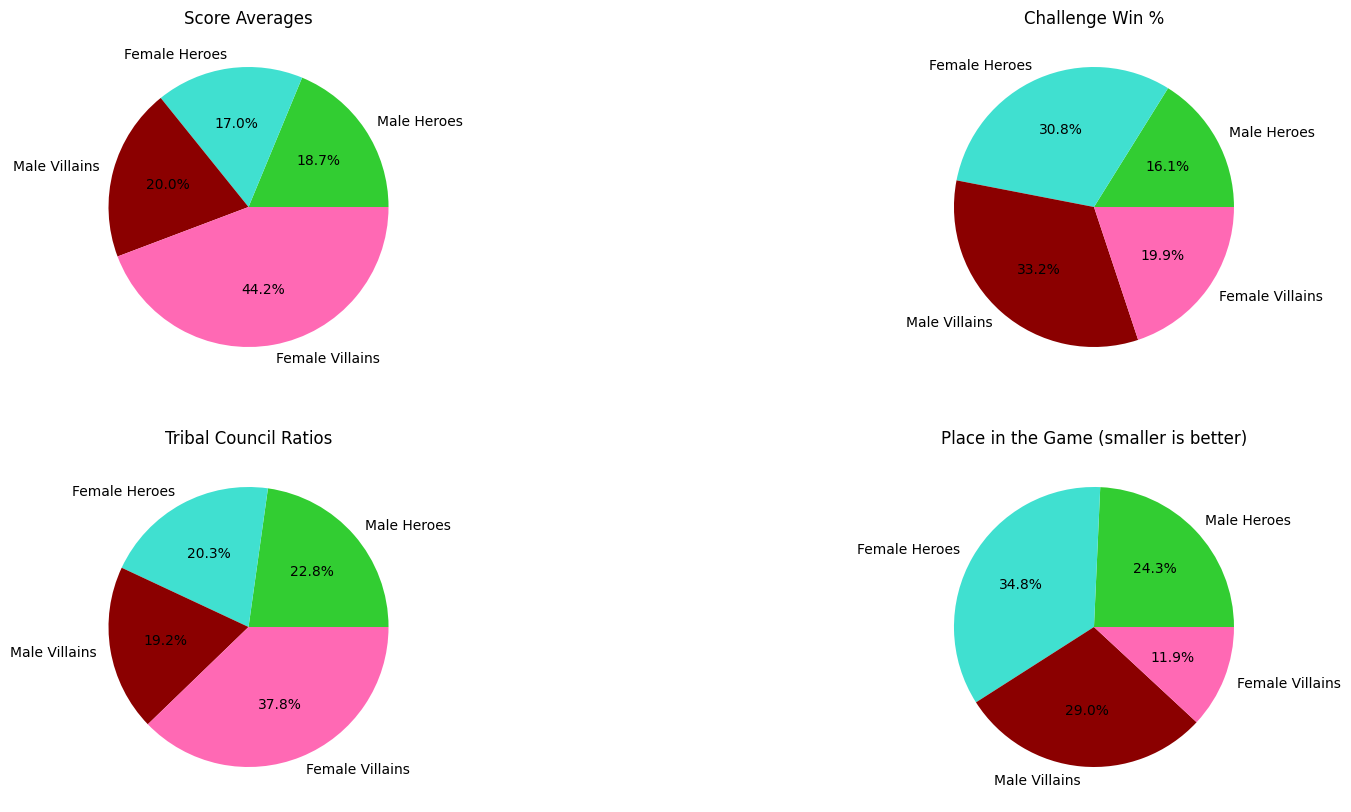

In [378]:
vm_score, hm_score, vf_score, hf_score = 0, 0, 0, 0
vm_chal, hm_chal, vf_chal, hf_chal = 0, 0, 0, 0
vm_tribal, hm_tribal, vf_tribal, hf_tribal = 0, 0, 0, 0
vm_place, hm_place, vf_place, hf_place = 0, 0, 0, 0
# iterate through S20 data and sorting based on male vs female and hero vs villain
for i, rows in scoring_data_20.iterrows():
    if scoring_data_20.at[i, 'H or V'] == 'Hero':
        if scoring_data_20.at[i, 'M or F'] == 'Male':
            hm_score += scoring_data_20.at[i, 'Survival Average']
            hm_chal += scoring_data_20.at[i, 'Challenge Win %']
            hm_tribal += scoring_data_20.at[i, 'TribalRatio']
            hm_place += scoring_data_20.at[i, 'Place']
        else:
            hf_score += scoring_data_20.at[i, 'Survival Average']
            hf_chal += scoring_data_20.at[i, 'Challenge Win %']
            hf_tribal += scoring_data_20.at[i, 'TribalRatio']
            hf_place += scoring_data_20.at[i, 'Place']
    else:
        if scoring_data_20.at[i, 'M or F'] == 'Male':
            vm_score += scoring_data_20.at[i, 'Survival Average']
            vm_chal += scoring_data_20.at[i, 'Challenge Win %']
            vm_tribal += scoring_data_20.at[i, 'TribalRatio']
            vm_place += scoring_data_20.at[i, 'Place']
        else:
            vf_score += scoring_data_20.at[i, 'Survival Average']
            vf_chal += scoring_data_20.at[i, 'Challenge Win %']
            vf_tribal += scoring_data_20.at[i, 'TribalRatio']
            vf_place += scoring_data_20.at[i, 'Place']

# make pie charts for each of the categories with each of our archetypes
fig, axis = plt.subplots(2,2)
fig.set_size_inches(20,10)
axis[0,0].set_title('Score Averages')
axis[0,0].pie([hm_score, hf_score, vm_score, vf_score], labels=['Male Heroes', 'Female Heroes', 'Male Villains', 'Female Villains'], colors=['limegreen', 'turquoise', 'darkred', 'hotpink'], autopct='%1.1f%%')
axis[0,1].set_title('Challenge Win %')
axis[0,1].pie([hm_chal, hf_chal, vm_chal, vf_chal], labels=['Male Heroes', 'Female Heroes', 'Male Villains', 'Female Villains'], colors=['limegreen', 'turquoise', 'darkred', 'hotpink'], autopct='%1.1f%%')
axis[1,0].set_title('Tribal Council Ratios')
axis[1,0].pie([hm_tribal, hf_tribal, vm_tribal, vf_tribal], labels=['Male Heroes', 'Female Heroes', 'Male Villains', 'Female Villains'], colors=['limegreen', 'turquoise', 'darkred', 'hotpink'], autopct='%1.1f%%')
axis[1,1].set_title('Place in the Game (smaller is better)')
axis[1,1].pie([hm_place, hf_place, vm_place, vf_place], labels=['Male Heroes', 'Female Heroes', 'Male Villains', 'Female Villains'], colors=['limegreen', 'turquoise', 'darkred', 'hotpink'], autopct='%1.1f%%')

Cumulatively, the female villains did the best in every category other than challenges, where the male villains barely beat the female heroes. It is notable that the overall performance of female villains outdoes any other archetype throughout this season.

Now let's get a visualization of the overall survival scores for each player. We will use a bar graph for this and the following 2 visualizations as well to easily see each category.

You can learn more about how to use bar graphs in matplotlib here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

Text(0, 0.5, 'Overall Scores')

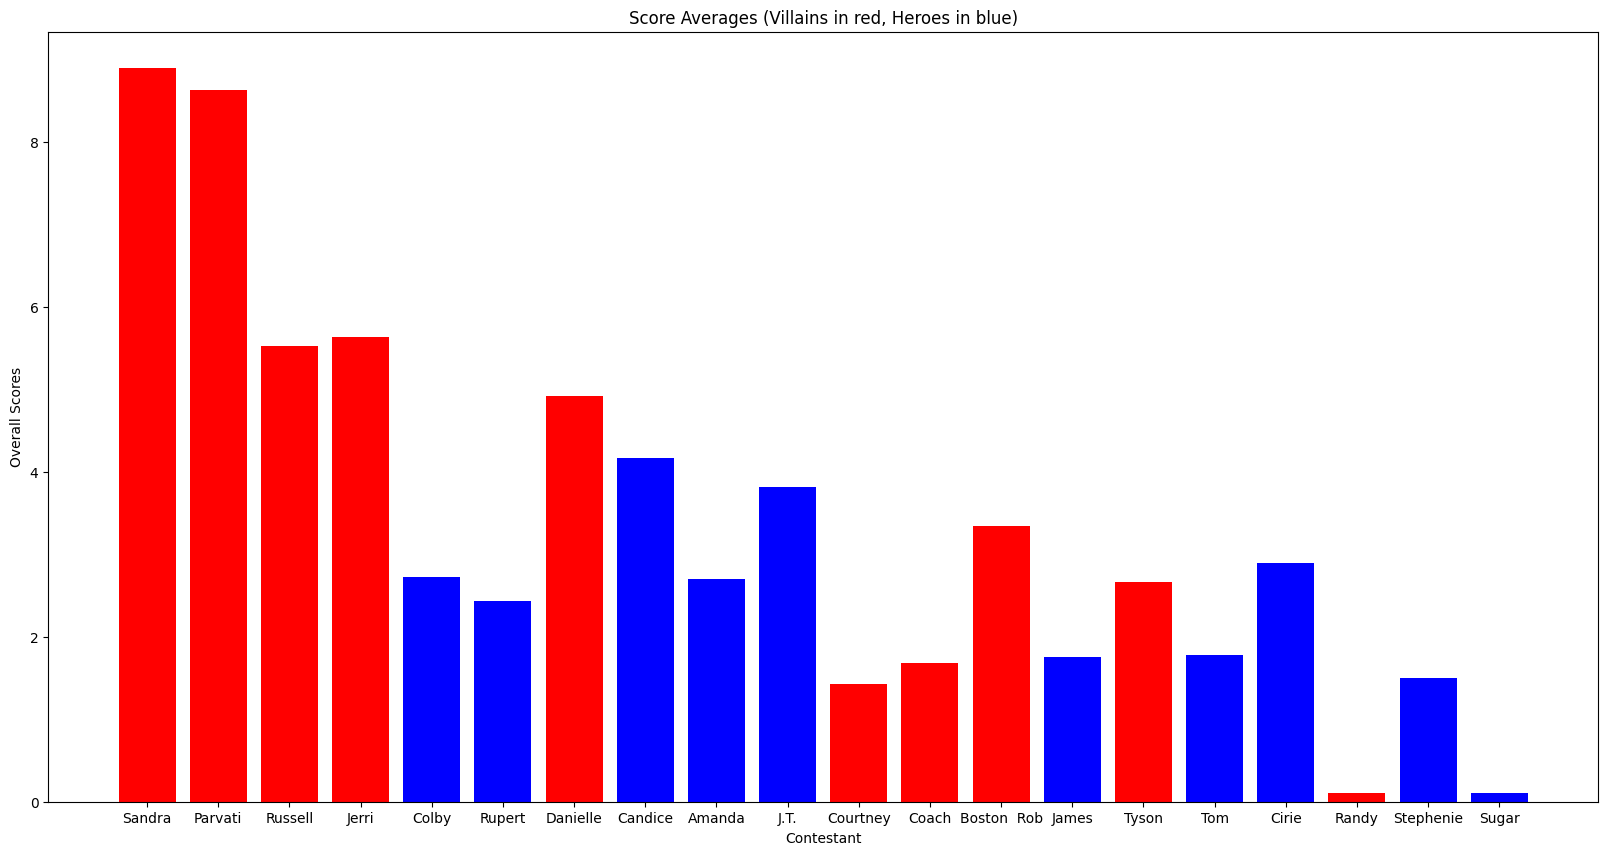

In [379]:
col = []
for val in scoring_data_20['H or V']:
    if val == 'Hero':
        col.append('blue')
    else:
        col.append('red')

plt.figure(figsize=(20, 10))
plt.bar(scoring_data_20['Contestant'], scoring_data_20['Survival Average'], color=col) 
plt.title('Score Averages (Villains in red, Heroes in blue)')
plt.xlabel('Contestant')
plt.ylabel('Overall Scores')

Now let's look at overall challenge wins

Text(0, 0.5, 'Challenge Wins')

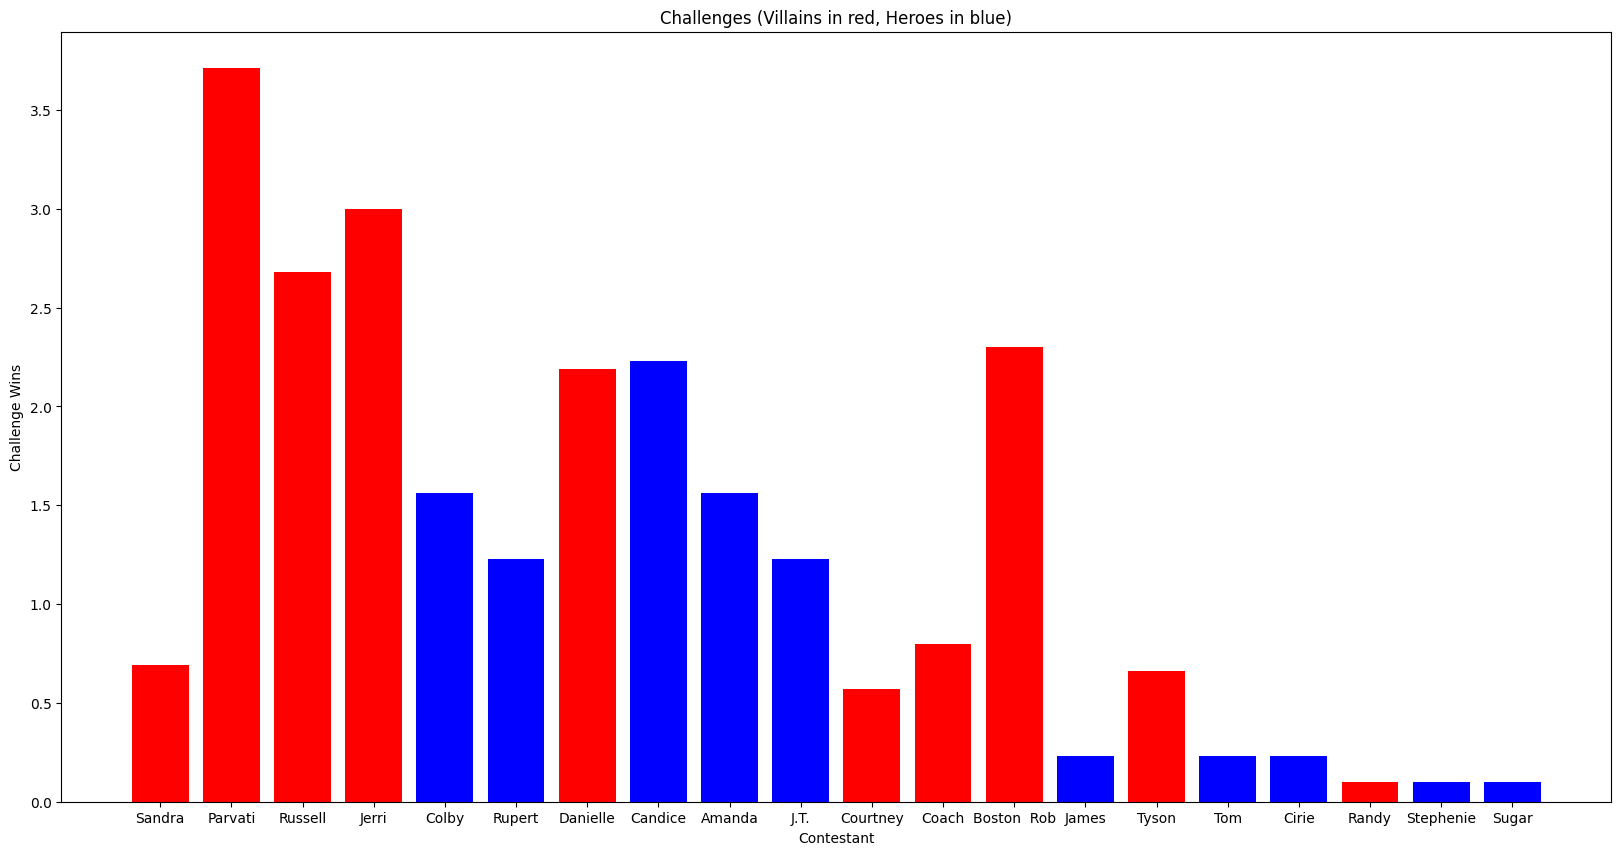

In [380]:
plt.figure(figsize=(20, 10))
plt.bar(scoring_data_20['Contestant'], scoring_data_20['Challenge Wins'], color=col) 
plt.title('Challenges (Villains in red, Heroes in blue)')
plt.xlabel('Contestant')
plt.ylabel('Challenge Wins')

Let's also look at Tribal Council Ratio

Text(0, 0.5, 'Tribal Council Ratio')

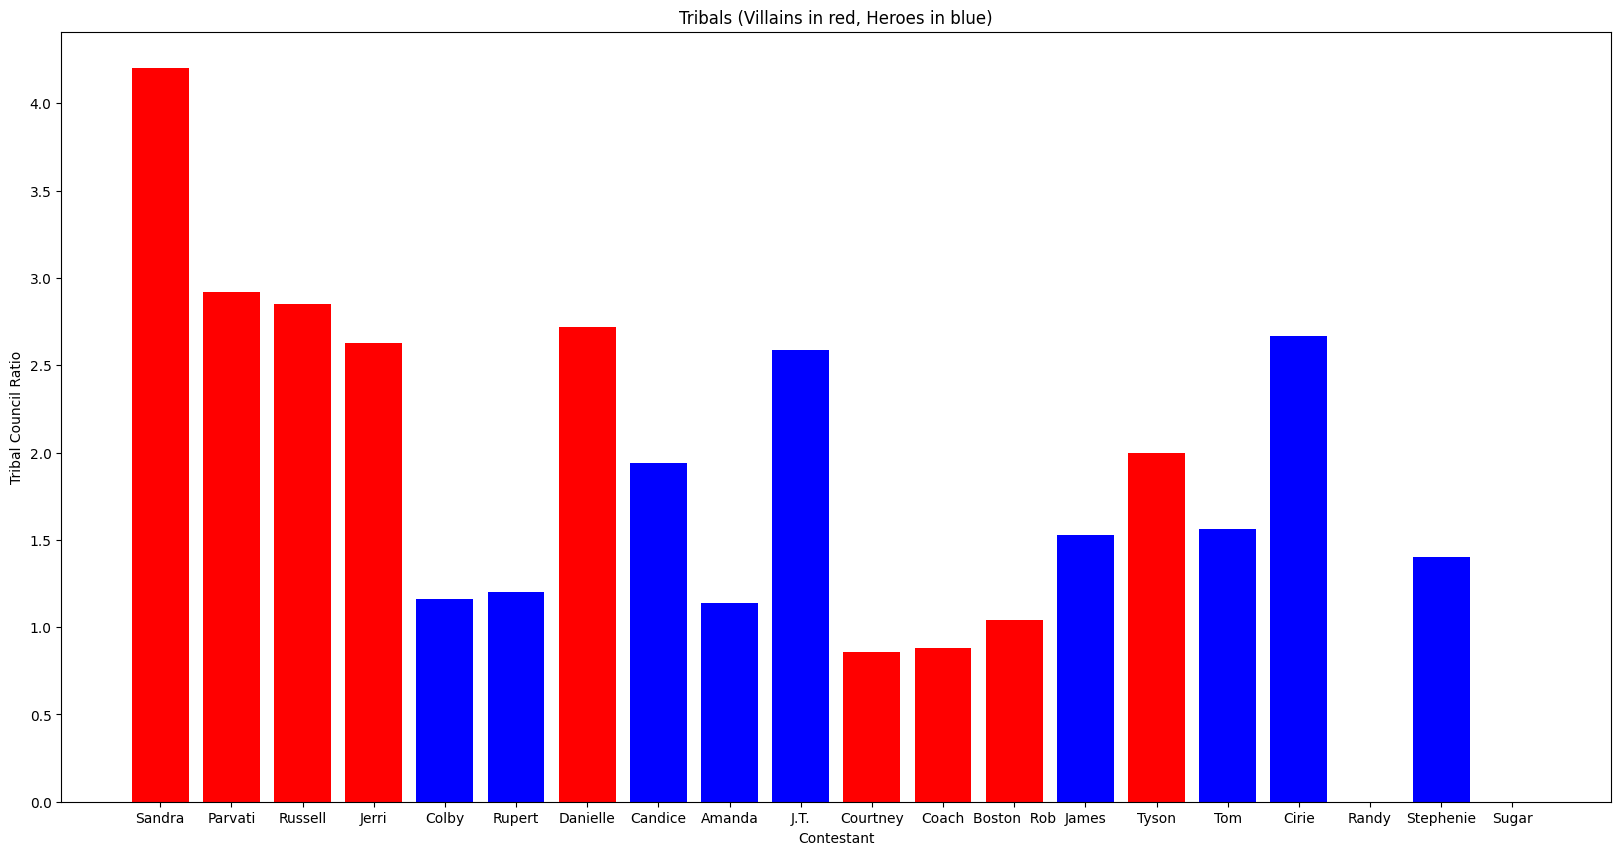

In [381]:
plt.figure(figsize=(20, 10))
plt.bar(scoring_data_20['Contestant'], scoring_data_20['TribalRatio'], color=col) 
plt.title('Tribals (Villains in red, Heroes in blue)')
plt.xlabel('Contestant')
plt.ylabel('Tribal Council Ratio')

And lastly, let's look at rankings

Text(0, 0.5, 'Ranking')

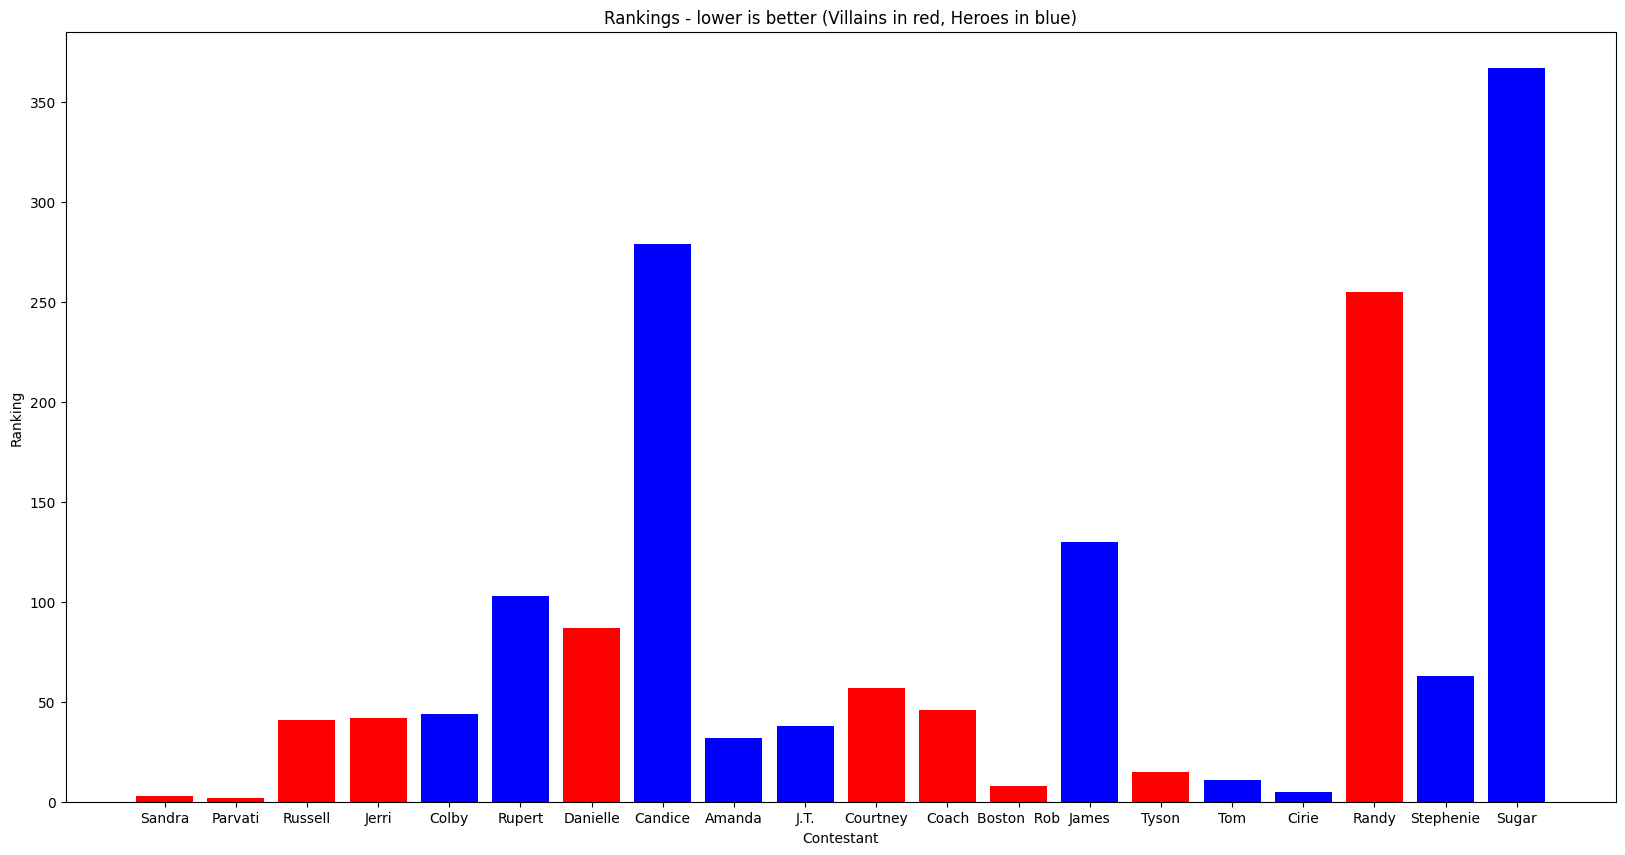

In [382]:
plt.figure(figsize=(20, 10))
plt.bar(scoring_data_20['Contestant'], scoring_data_20['Ranking'], color=col) 
plt.title('Rankings - lower is better (Villains in red, Heroes in blue)')
plt.xlabel('Contestant')
plt.ylabel('Ranking')

Now let's do some examining of Season 37. We will first make comparisons between david vs goliaths and men vs women for overall scores, challenge win percentages, tribal counicl ratios, and place in the game.

([<matplotlib.patches.Wedge at 0x16aa42950>,
 [Text(0.7719776568381522, 0.7836137424411826, 'Male Goliaths'),
  Text(-0.6728968170938096, 0.8701780700207402, 'Female Goliaths'),
  Text(-1.0239610760278548, -0.4018752477820422, 'Male Davids'),
  Text(0.5356878576211734, -0.9607489366099958, 'Female Davids')],
 [Text(0.42107872191171936, 0.42742567769519046, '25.2%'),
  Text(-0.3670346275057143, 0.4746425836476764, '20.5%'),
  Text(-0.5585242232879207, -0.21920468060838663, '20.5%'),
  Text(0.2921933768842764, -0.5240448745145431, '33.8%')])

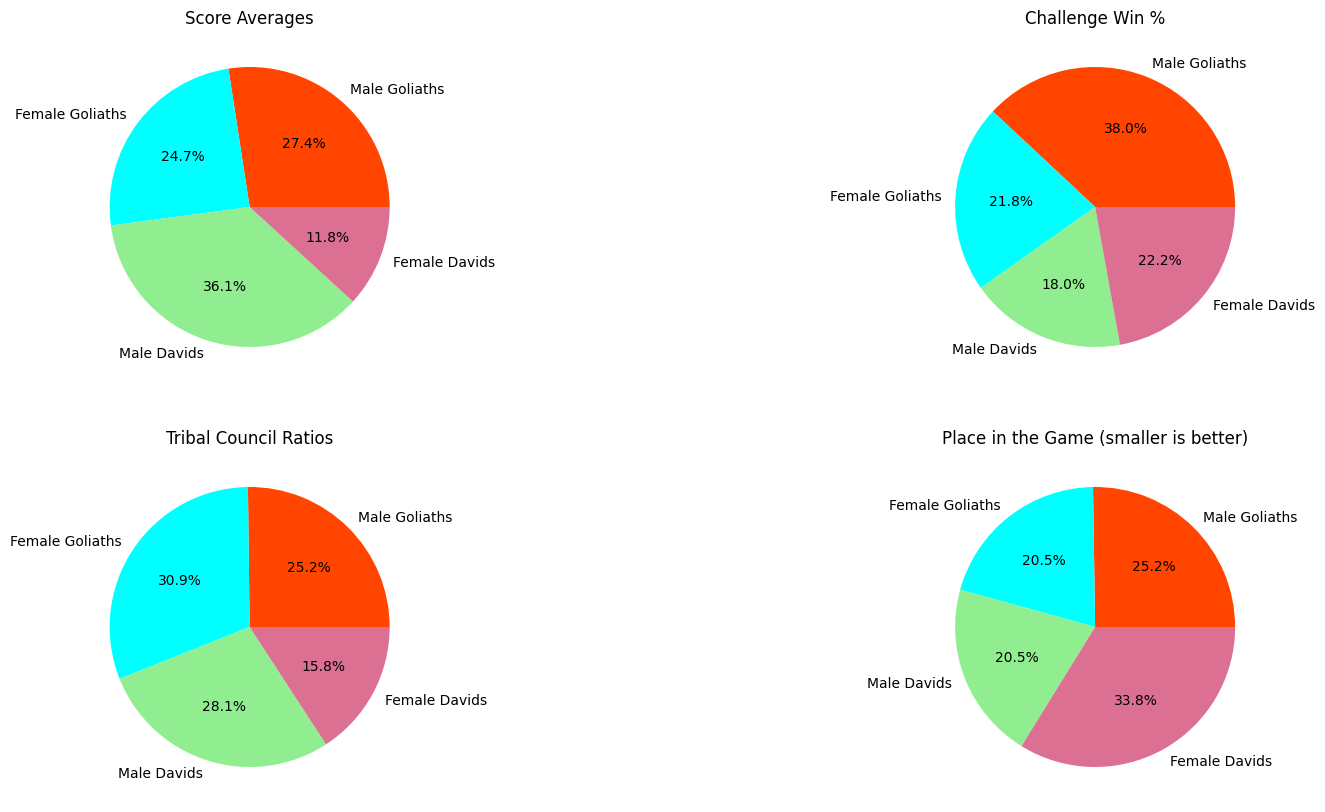

In [383]:
gm_score, dm_score, gf_score, df_score = 0, 0, 0, 0
gm_chal, dm_chal, gf_chal, df_chal = 0, 0, 0, 0
gm_tribal, dm_tribal, gf_tribal, df_tribal = 0, 0, 0, 0
gm_place, dm_place, gf_place, df_place = 0, 0, 0, 0
# same iterations as previous season, but instead of H/V we are doing David or Goliath with male or female
for i, rows in scoring_data_37.iterrows():
    if scoring_data_37.at[i, 'D or G'] == 'Goliath':
        if scoring_data_37.at[i, 'M or F'] == 'Male':
            gm_score += scoring_data_37.at[i, 'Survival Average']
            gm_chal += scoring_data_37.at[i, 'Challenge Win %']
            gm_tribal += scoring_data_37.at[i, 'TribalRatio']
            gm_place += scoring_data_37.at[i, 'Place']
        else:
            gf_score += scoring_data_37.at[i, 'Survival Average']
            gf_chal += scoring_data_37.at[i, 'Challenge Win %']
            gf_tribal += scoring_data_37.at[i, 'TribalRatio']
            gf_place += scoring_data_37.at[i, 'Place']
    else:
        if scoring_data_37.at[i, 'M or F'] == 'Male':
            dm_score += scoring_data_37.at[i, 'Survival Average']
            dm_chal += scoring_data_37.at[i, 'Challenge Win %']
            dm_tribal += scoring_data_37.at[i, 'TribalRatio']
            dm_place += scoring_data_37.at[i, 'Place']
        else:
            df_score += scoring_data_37.at[i, 'Survival Average']
            df_chal += scoring_data_37.at[i, 'Challenge Win %']
            df_tribal += scoring_data_37.at[i, 'TribalRatio']
            df_place += scoring_data_37.at[i, 'Place']

# plot pie charts for each archetype in each category
fig, axis = plt.subplots(2,2)
fig.set_size_inches(20,10)
axis[0,0].set_title('Score Averages')
axis[0,0].pie([gm_score, gf_score, dm_score, df_score], labels=['Male Goliaths', 'Female Goliaths', 'Male Davids', 'Female Davids'], colors=['orangered', 'aqua', 'lightgreen', 'palevioletred'], autopct='%1.1f%%')
axis[0,1].set_title('Challenge Win %')
axis[0,1].pie([gm_chal, gf_chal, dm_chal, df_chal], labels=['Male Goliaths', 'Female Goliaths', 'Male Davids', 'Female Davids'], colors=['orangered', 'aqua', 'lightgreen', 'palevioletred'], autopct='%1.1f%%')
axis[1,0].set_title('Tribal Council Ratios')
axis[1,0].pie([gm_tribal, gf_tribal, dm_tribal, df_tribal], labels=['Male Goliaths', 'Female Goliaths', 'Male Davids', 'Female Davids'], colors=['orangered', 'aqua', 'lightgreen', 'palevioletred'], autopct='%1.1f%%')
axis[1,1].set_title('Place in the Game (smaller is better)')
axis[1,1].pie([gm_place, gf_place, dm_place, df_place], labels=['Male Goliaths', 'Female Goliaths', 'Male Davids', 'Female Davids'], colors=['orangered', 'aqua', 'lightgreen', 'palevioletred'], autopct='%1.1f%%')

These pie charts have slightly closer margins and more diverse results than those from Season 20. We see the male davids have the highest score averages and tied female goliaths for overall place in the game. The female goliaths also had the highest tribal council ratios. And lastly, the male goliaths won for challenge win percentages. So overall, the male davids and female goliaths did the best, while the female davids did the worst.

Now let's take a look at individual player data for Season 37. We will look at overall scores, total challenge wins, tribal council ratios, and rankings using bar graphs again.

Text(0, 0.5, 'Overall Scores')

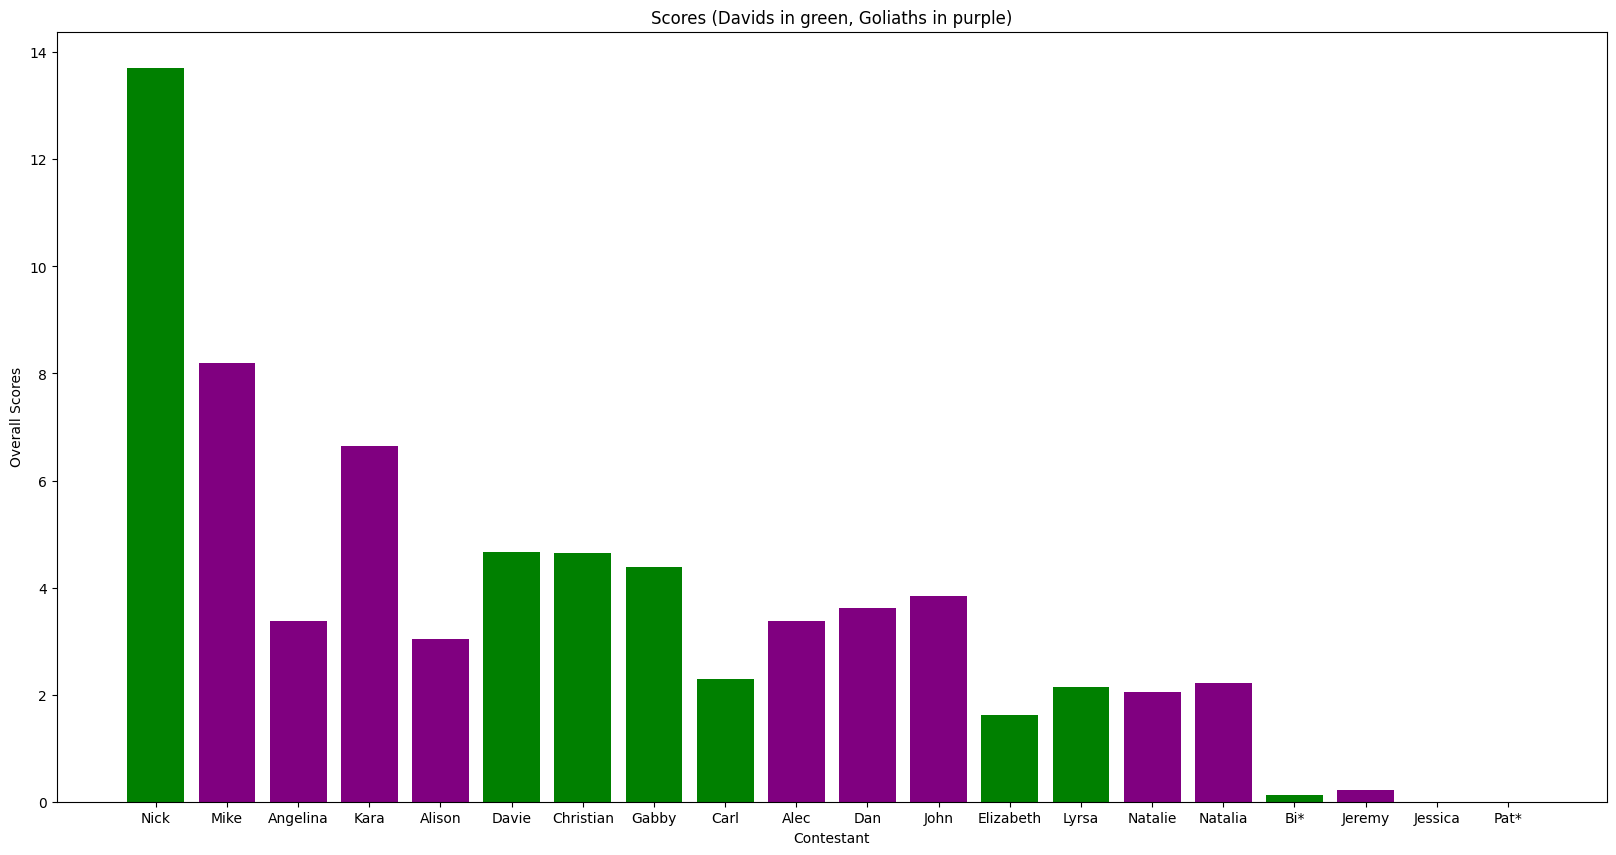

In [384]:
col2 = []
for val in scoring_data_37['D or G']:
    if val == 'David':
        col2.append('green')
    else:
        col2.append('purple')

plt.figure(figsize=(20, 10))
plt.bar(scoring_data_37['Contestant'], scoring_data_37['Survival Average'], color=col2) 
plt.title('Scores (Davids in green, Goliaths in purple)')
plt.xlabel('Contestant')
plt.ylabel('Overall Scores')

Text(0, 0.5, 'Challenge Wins')

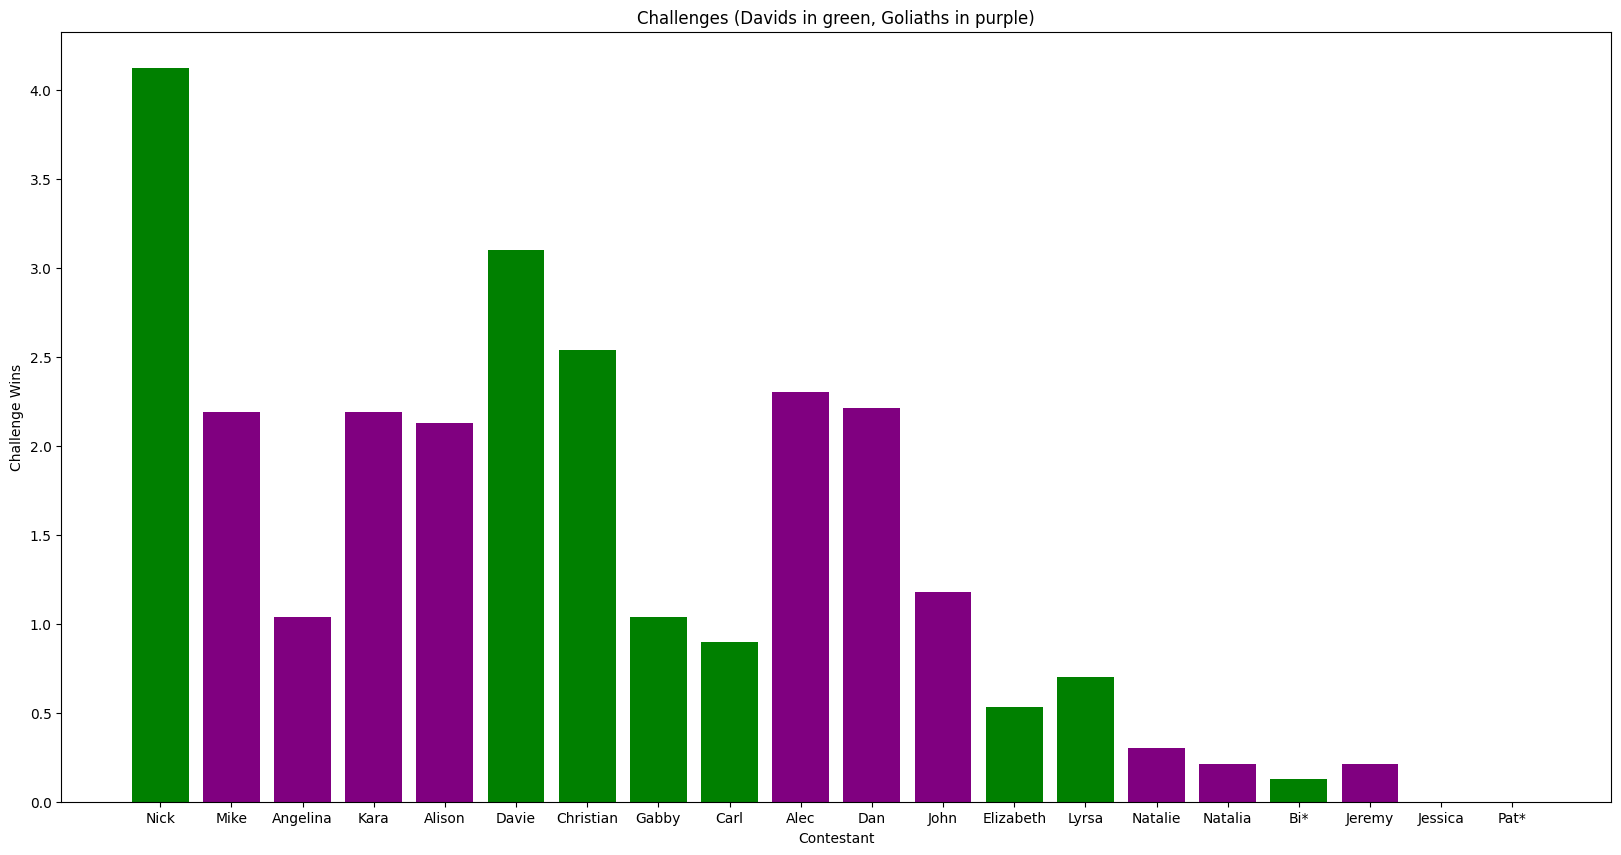

In [385]:
plt.figure(figsize=(20, 10))
plt.bar(scoring_data_37['Contestant'], scoring_data_37['Challenge Wins'], color=col2) 
plt.title('Challenges (Davids in green, Goliaths in purple)')
plt.xlabel('Contestant')
plt.ylabel('Challenge Wins')

Text(0, 0.5, 'Tribal Council Ratio')

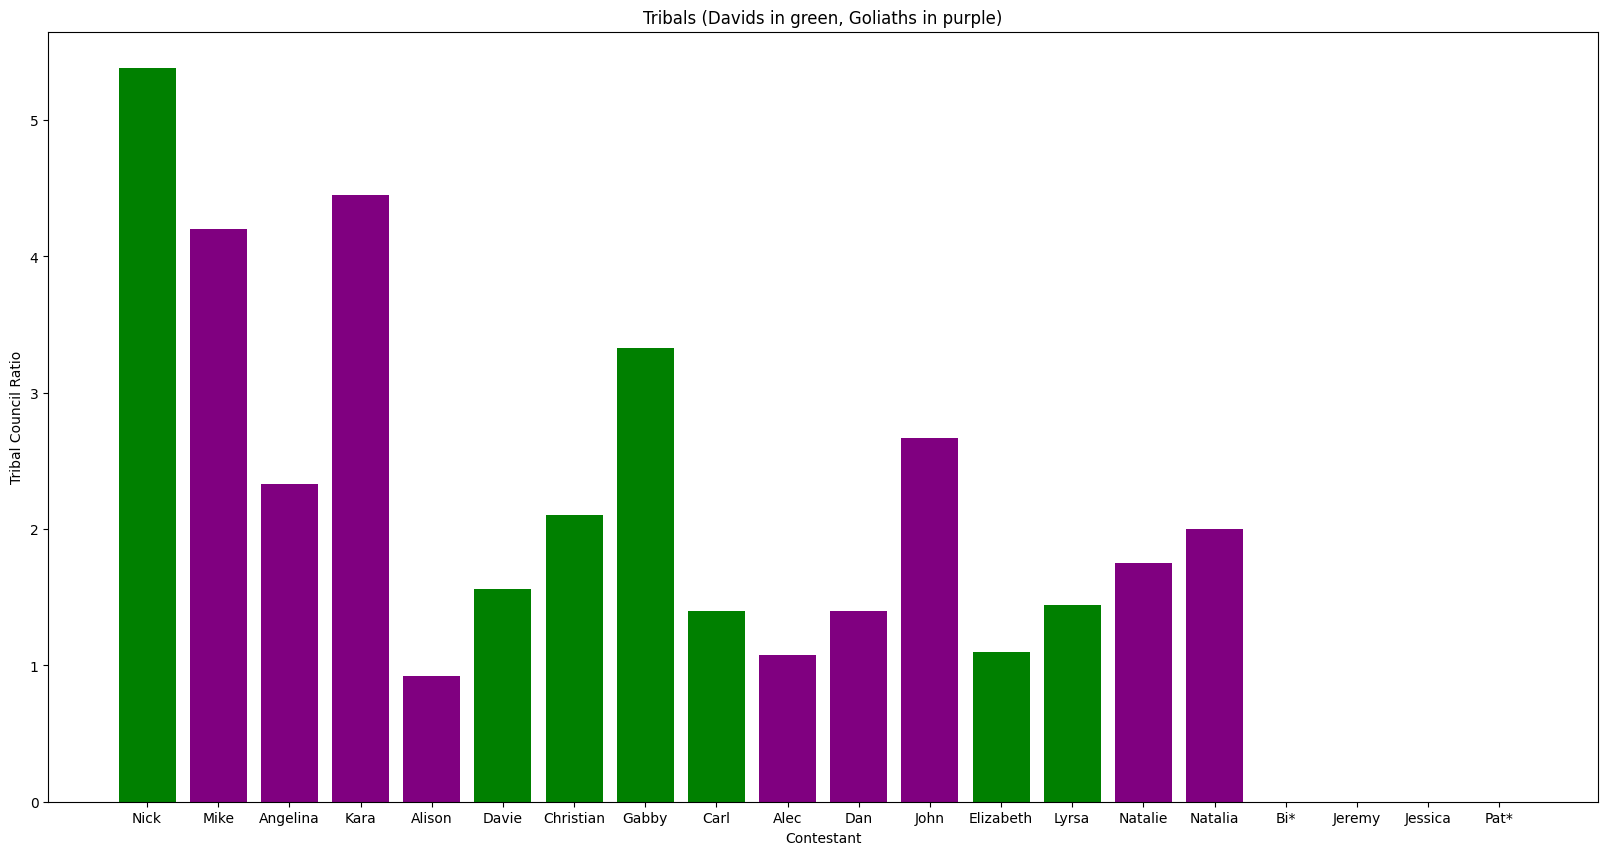

In [386]:
plt.figure(figsize=(20, 10))
plt.bar(scoring_data_37['Contestant'], scoring_data_37['TribalRatio'], color=col2) 
plt.title('Tribals (Davids in green, Goliaths in purple)')
plt.xlabel('Contestant')
plt.ylabel('Tribal Council Ratio')

Text(0, 0.5, 'Ranking')

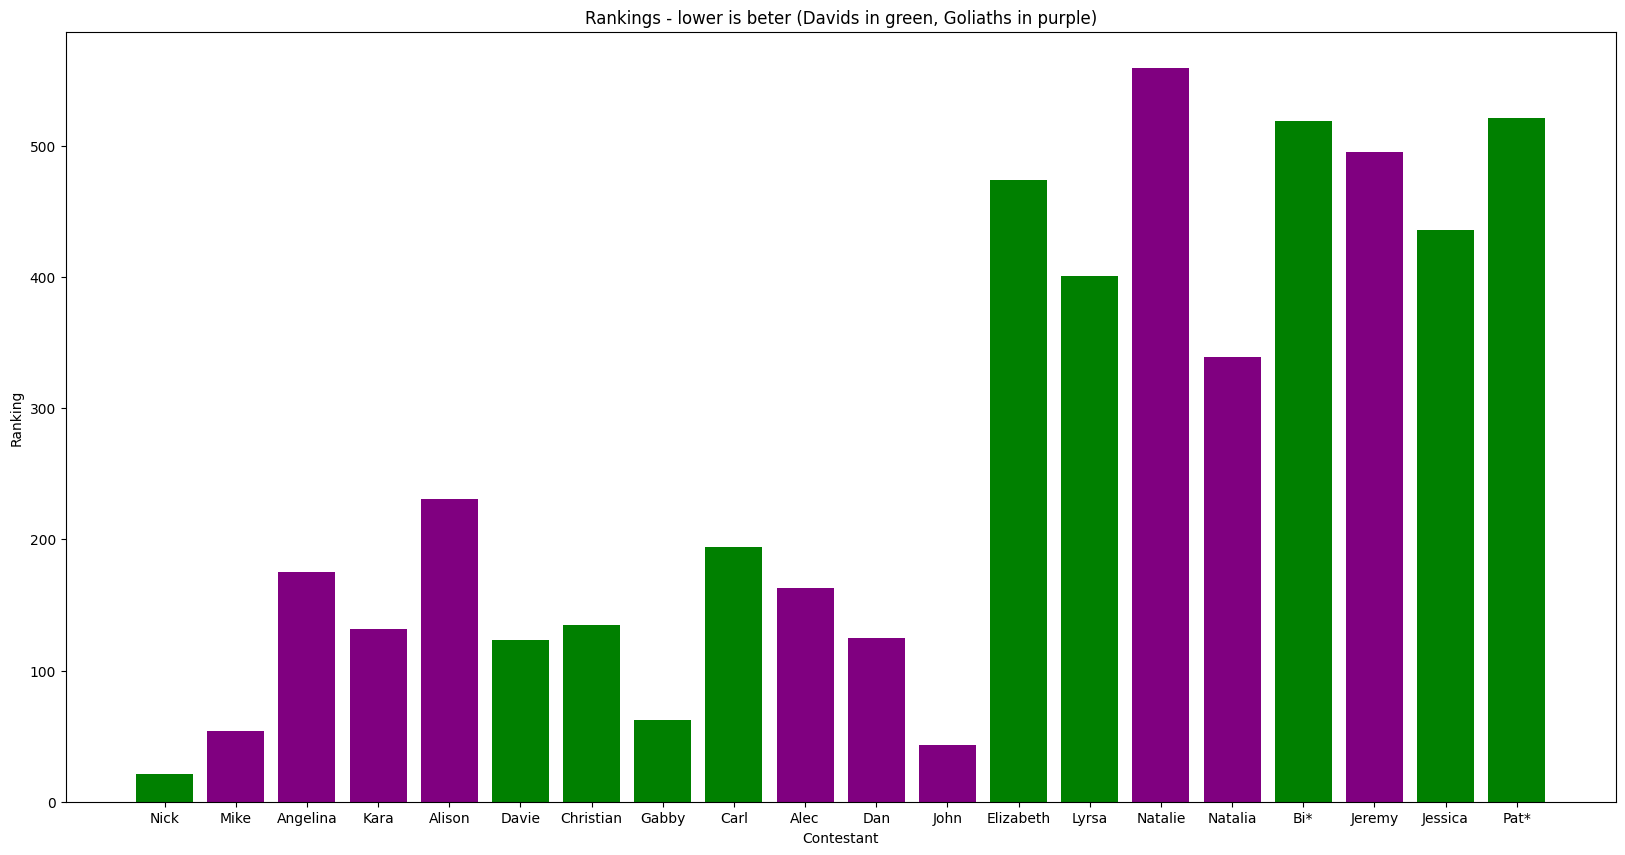

In [387]:
plt.figure(figsize=(20, 10))
plt.bar(scoring_data_37['Contestant'], scoring_data_37['Ranking'], color=col2) 
plt.title('Rankings - lower is beter (Davids in green, Goliaths in purple)')
plt.xlabel('Contestant')
plt.ylabel('Ranking')

Now, let's make some comparisons between players from each season.

In [388]:
divisor = 20

S20_score_av = scoring_data_20['Survival Average'].sum()/divisor
S37_score_av = scoring_data_37['Survival Average'].sum()/divisor
print('S20 Score Average: ' + str(S20_score_av))
print('S37 Score Average: ' + str(S37_score_av))

S20_chal_av = scoring_data_20['Challenge Win %'].sum()/divisor
S37_chal_av = scoring_data_37['Challenge Win %'].sum()/divisor
print('S20 Challenge Average: ' + str(S20_chal_av))
print('S37 Challenge Average: ' + str(S37_chal_av))

S20_trib_av = scoring_data_20['TribalRatio'].sum()/divisor
S37_trib_av = scoring_data_37['TribalRatio'].sum()/divisor
print('S20 Tribal Average: ' + str(S20_trib_av))
print('S37 Tribal Average: ' + str(S37_trib_av))

S20_rank_av = scoring_data_20['Ranking'].sum()/divisor
S37_rank_av = scoring_data_37['Ranking'].sum()/divisor
print('S20 Ranking Average: ' + str(S20_rank_av))
print('S37 Ranking Average: ' + str(S37_rank_av))

S20 Score Average: 3.3334999999999995
S37 Score Average: 3.5055
S20 Challenge Average: 0.27899999999999997
S37 Challenge Average: 0.255
S20 Tribal Average: 1.7645
S37 Tribal Average: 1.8555
S20 Ranking Average: 81.4
S37 Ranking Average: 260.1


This is interesting because the players of 37 did slightly better as far as scores related to the game go, but their average ranking was way higher than the players of season 20. This might have something to do with S20 having returning players, however we can't know for sure.

Let's do some other investigations before hypothesizing. Now we are going to combine the data from both seasons, sorted by place in the game and take a look at these visual comparisons again with bar graphs. 

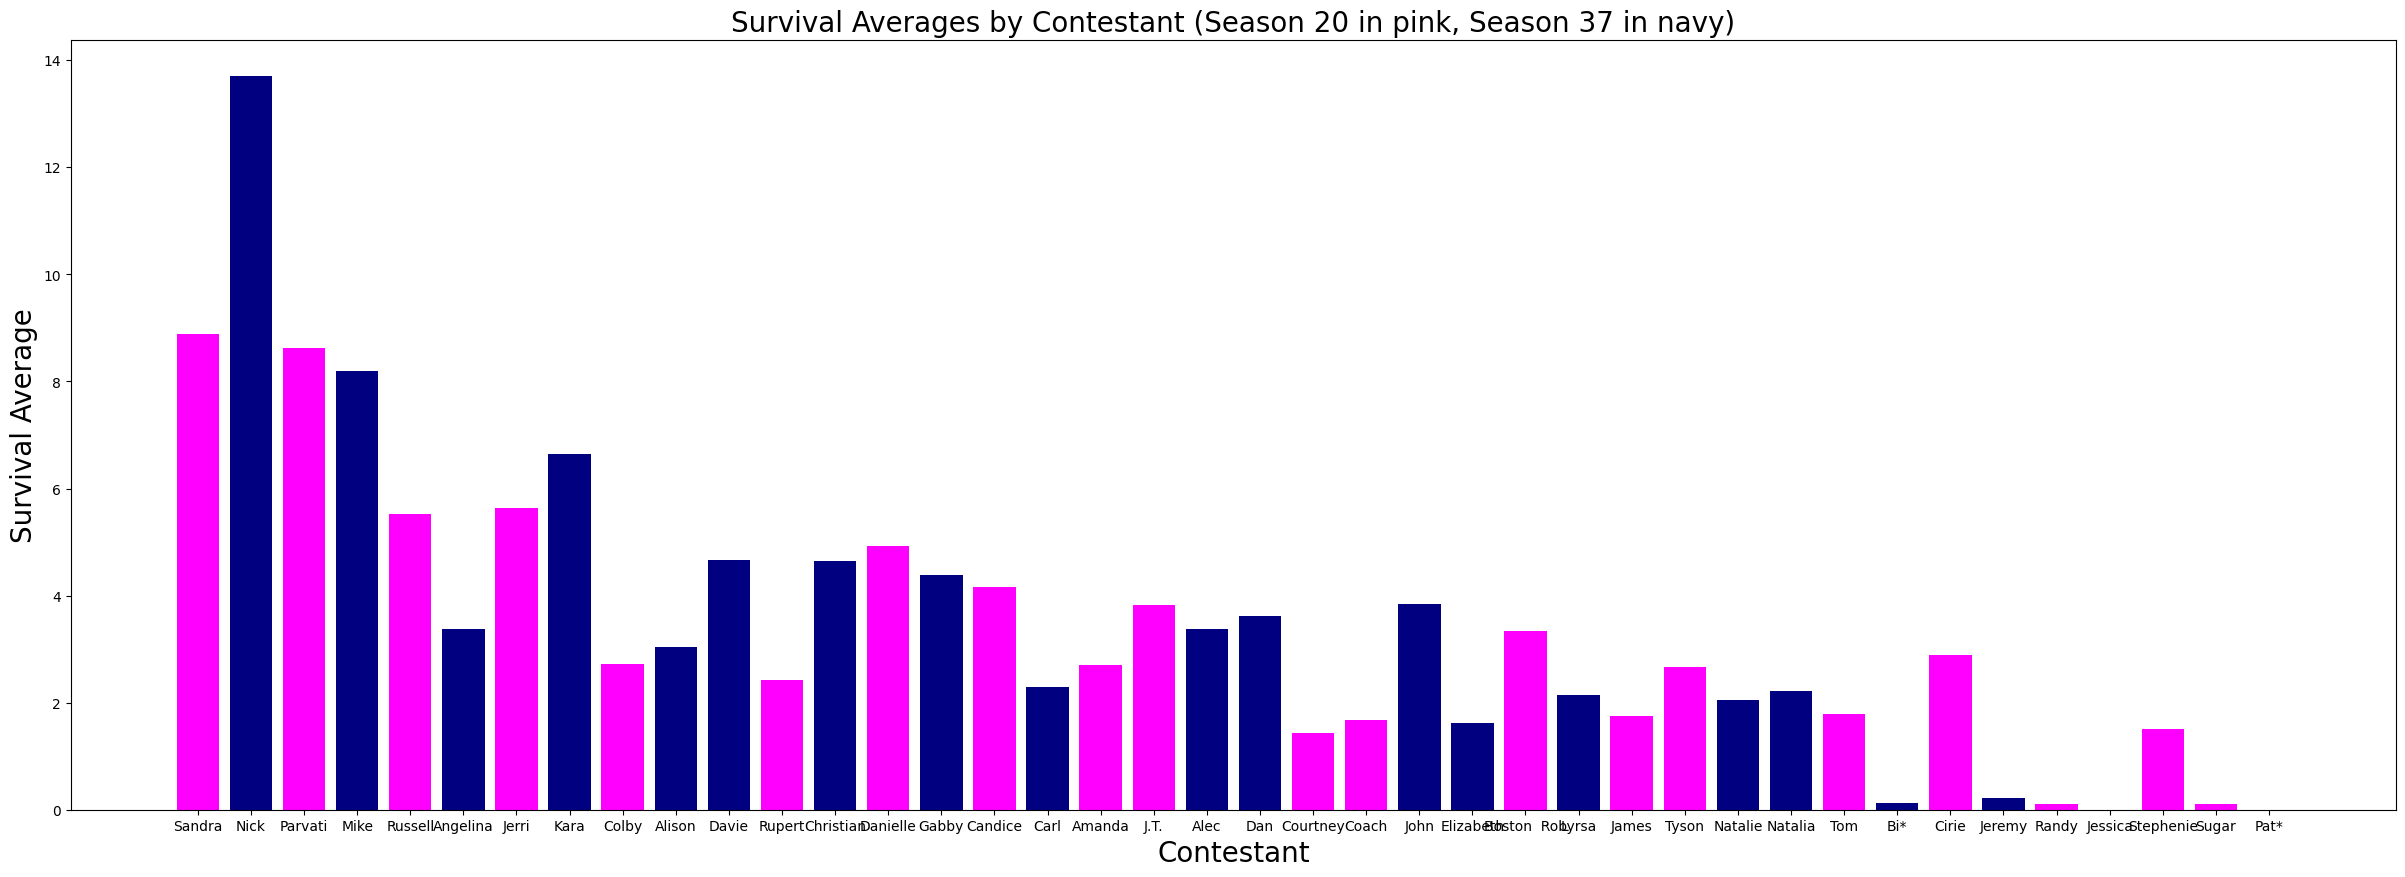

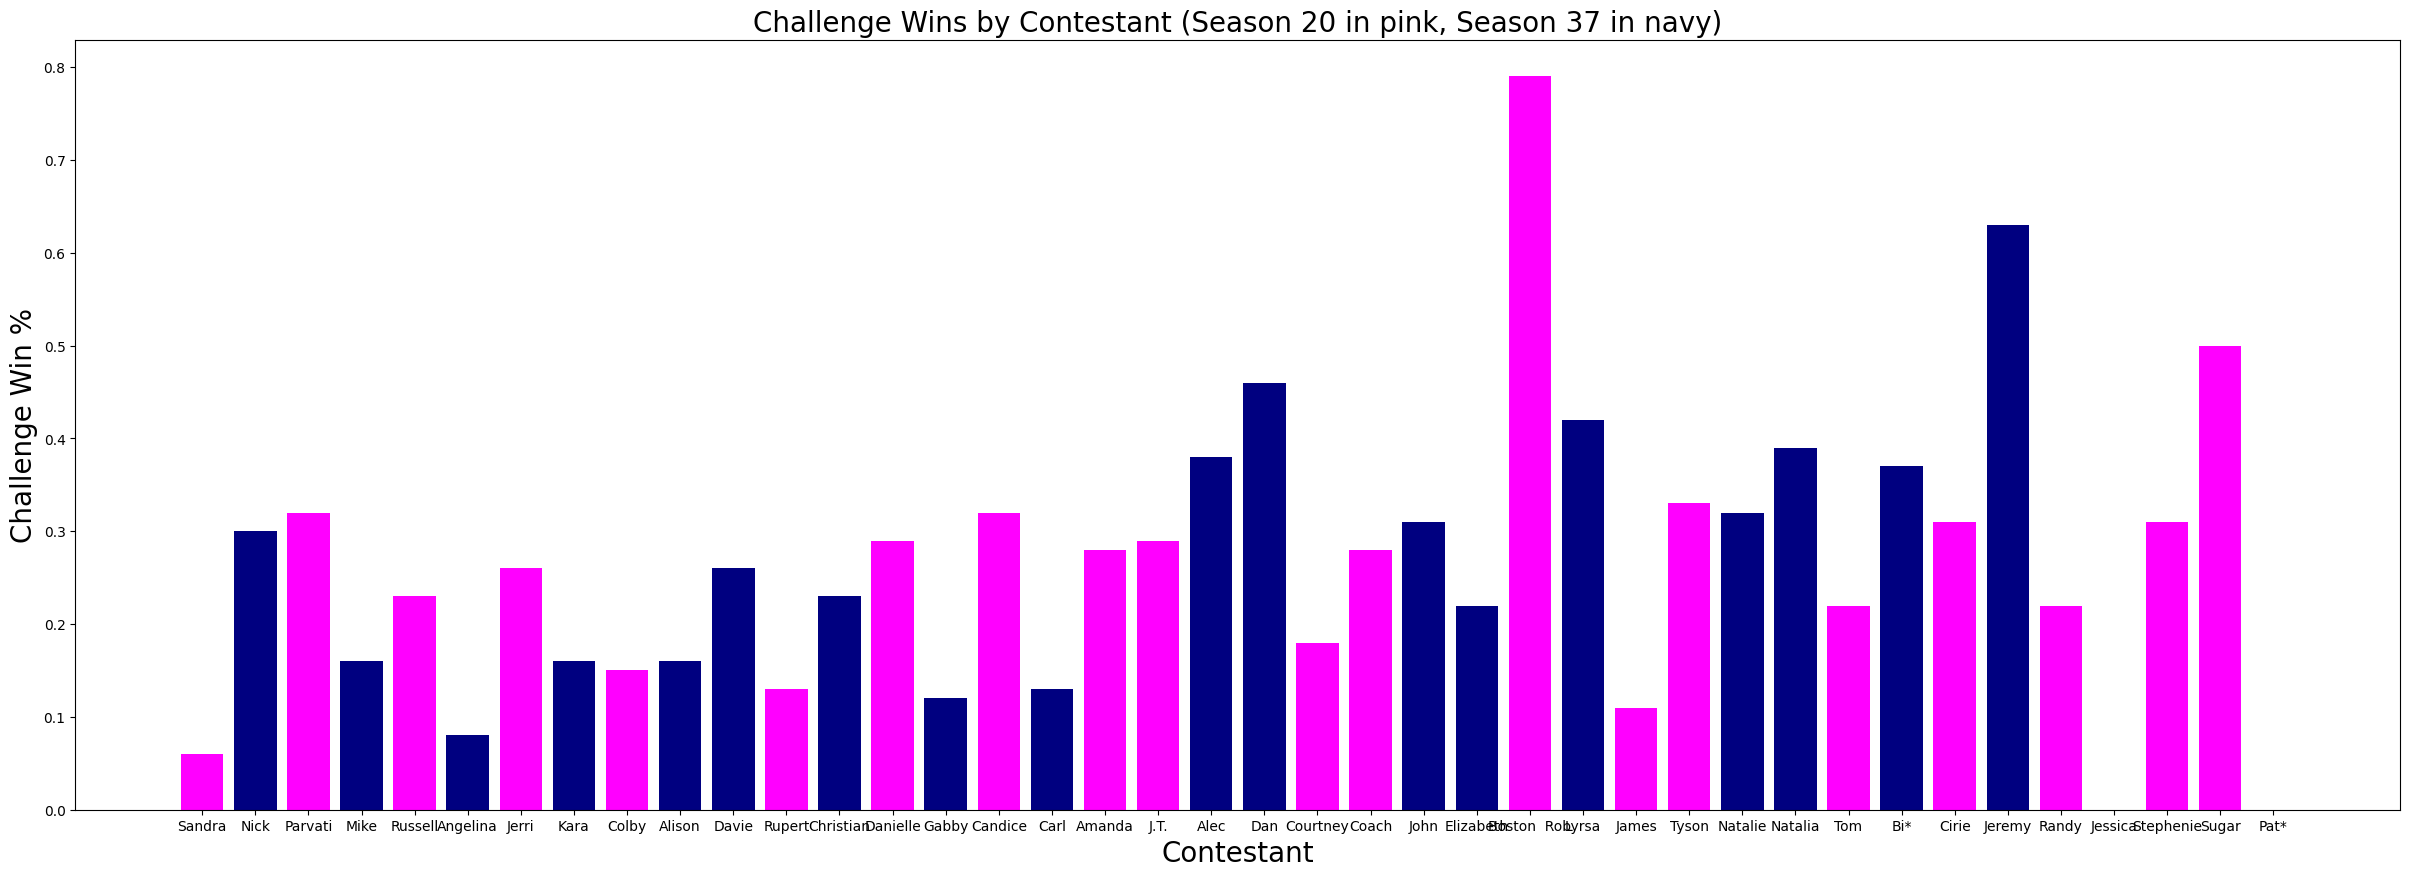

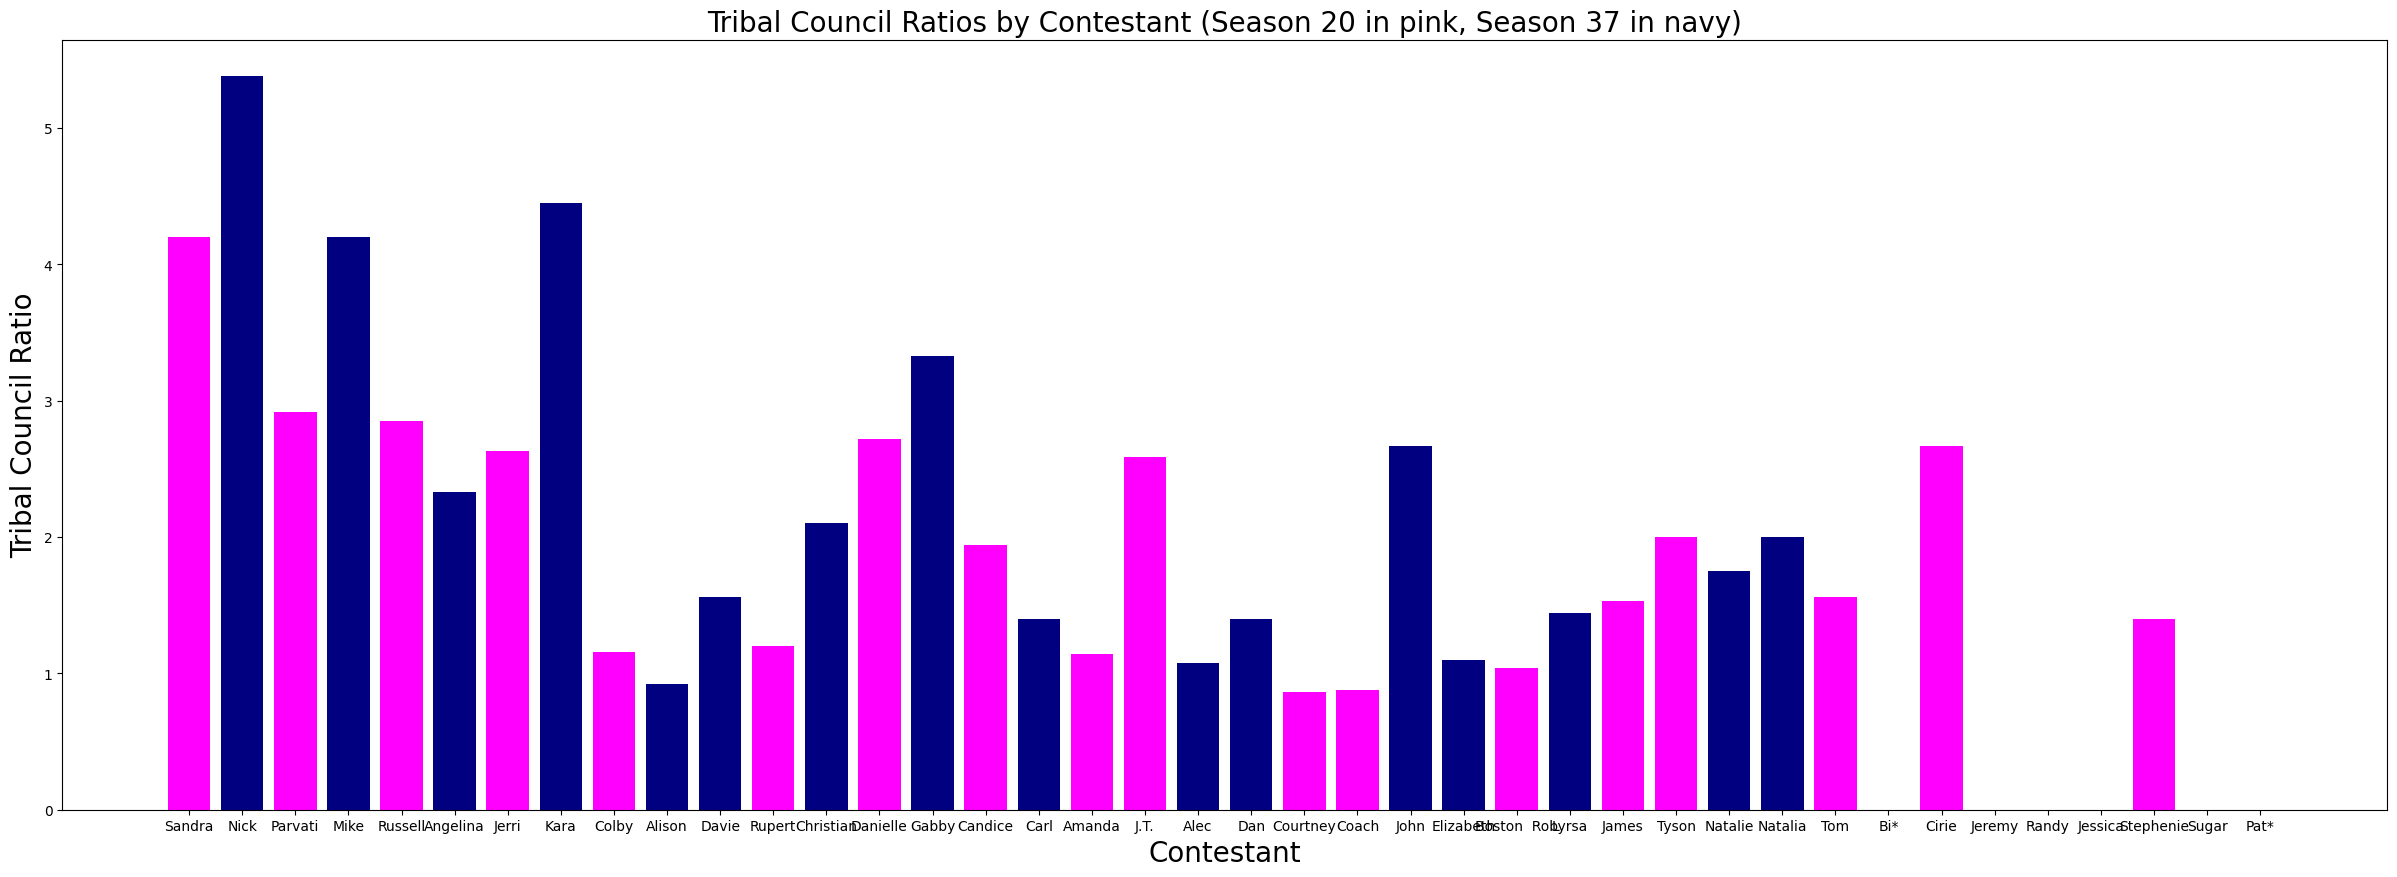

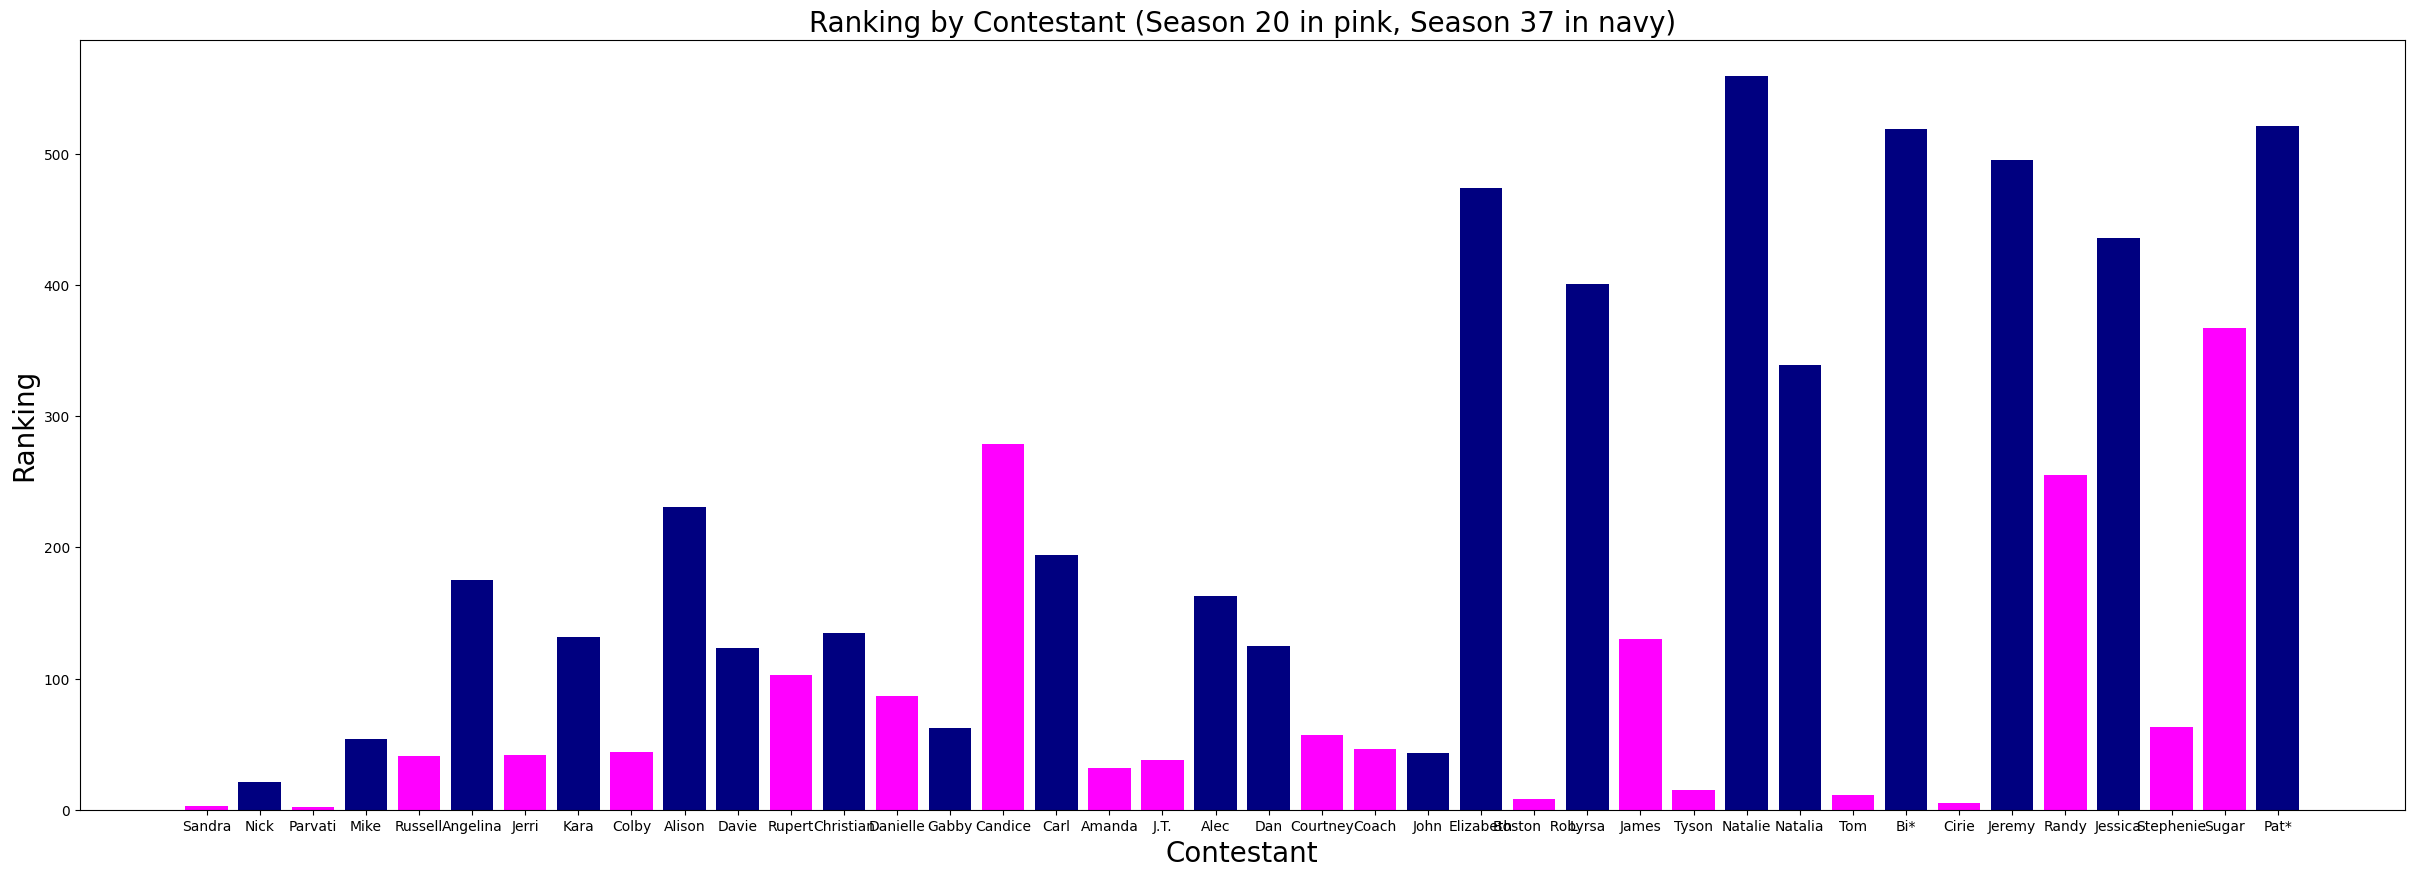

In [389]:
combined = [scoring_data_20, scoring_data_37]
combined_seasons = pd.concat(combined)
combined_seasons = combined_seasons.sort_values('Place')
#print(combined_seasons)

combined_seasons.fillna('NaN', inplace=True)
col3 = []
for val in combined_seasons['D or G']:
    if val == 'NaN':
        col3.append('magenta')
    else:
        col3.append('navy')
        
# plot for survival averages
plt.figure(figsize=(30, 10))
plt.bar(combined_seasons['Contestant'], combined_seasons['Survival Average'], color=col3)
plt.title('Survival Averages by Contestant (Season 20 in pink, Season 37 in navy)', fontdict={'fontsize': 20})
plt.xlabel('Contestant', fontdict={'fontsize': 20})
plt.ylabel('Survival Average', fontdict={'fontsize': 20})
plt.show()
# plot for challenge win percents
plt.figure(figsize=(30, 10))
plt.bar(combined_seasons['Contestant'], combined_seasons['Challenge Win %'], color=col3)
plt.title('Challenge Wins by Contestant (Season 20 in pink, Season 37 in navy)', fontdict={'fontsize': 20})
plt.xlabel('Contestant', fontdict={'fontsize': 20})
plt.ylabel('Challenge Win %', fontdict={'fontsize': 20})
plt.show()
# plot for tribal council ratios
plt.figure(figsize=(30, 10))
plt.bar(combined_seasons['Contestant'], combined_seasons['TribalRatio'], color=col3)
plt.title('Tribal Council Ratios by Contestant (Season 20 in pink, Season 37 in navy)', fontdict={'fontsize': 20})
plt.xlabel('Contestant', fontdict={'fontsize': 20})
plt.ylabel('Tribal Council Ratio', fontdict={'fontsize': 20})
plt.show()
# plot for rankings
plt.figure(figsize=(30, 10))
plt.bar(combined_seasons['Contestant'], combined_seasons['Ranking'], color=col3)
plt.title('Ranking by Contestant (Season 20 in pink, Season 37 in navy)', fontdict={'fontsize': 20})
plt.xlabel('Contestant', fontdict={'fontsize': 20})
plt.ylabel('Ranking', fontdict={'fontsize': 20})
plt.show()

Analysis

Since our data is sorted based on each players place in the game, these visualizations give us an idea of how each other category correlates with their place in the game. From the visualization, we can see the challenge win % indicates the weakest correlation with place in the game as the data is pretty evenly spread across the players. We can also see that the survival average scores and tribal council ratios have a similar looking correlation with place in the game. The ranking poses an interesting relationship because Season 37 players have a clear correlation between ranking and place, while Season 20 players do not. 



Hypothesis Testing and Machine Learning

Based on the visuals we provided during our exploratory analysis, we are ready to move into our next stage in the pipeline. From our graphs the tribal council ratios and survival averages have the clearest correlation with place in the game, we would like to focus on those. However, since the challenge win % did not have a good correlation and that score factors into the survival averages, we are going to look into tribal council ratios.

I will be hypothesizing that the higher a players tribal council ratio is, the better they will place in the game.
This means the following:

My Null Hypothesis is a players tribal council ratio does not have a significant impact on how they will place in the game. My Alternate Hypothesis is a players tribal council ratio has a significant impact on how they will place in the game.

To test this, we will create a model using linear regression. We will be using statsmodels Ordinary Least Squares (OLS) machine learning algorithm to do this. You can learn more about this here: https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/

In [395]:
mod = smf.ols(formula='TribalRatio ~ Place', data=combined_seasons)
res = mod.fit()
print(res.params)
print(res.summary())

Intercept    3.452421
Place       -0.156421
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            TribalRatio   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     37.26
Date:                Thu, 11 May 2023   Prob (F-statistic):           4.10e-07
Time:                        18:48:03   Log-Likelihood:                -53.025
No. Observations:                  40   AIC:                             110.1
Df Residuals:                      38   BIC:                             113.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

Here we can see a summary of all our information from OLS, inclduing the f statistic and R squared value.

Now we are going to use OLS more in depth with a train and test set for building the model and seeing how accurate it is.

Ordinary Least Squares Results:
Coefficients: [-0.15414858]
Intercept: [3.38392545]
Mean squared error: 0.8816688258652523
Coefficient of determination: 0.6193080609779547


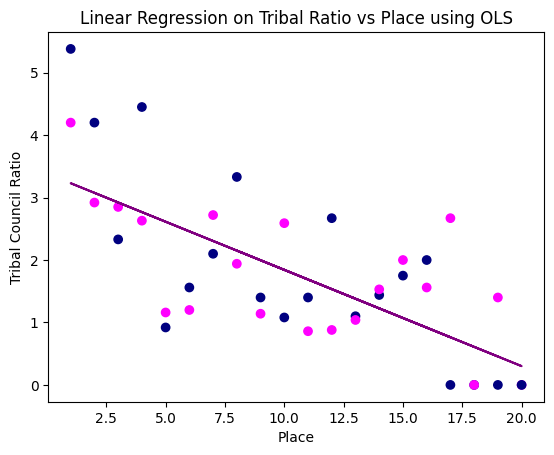

In [392]:
# divide data into train and test sets
X = np.array(combined_seasons['Place']).reshape(-1, 1)
Y = np.array(combined_seasons['TribalRatio']).reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
# perform linear regression
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# print relevant results
print('Ordinary Least Squares Results:')
print('Coefficients: ' + str(model.coef_[0]))
print('Intercept: ' + str(model.intercept_))
print('Mean squared error: ' + str(mean_squared_error(Y_test, Y_pred)))
print('Coefficient of determination: ' + str(r2_score(Y_test, Y_pred)))

# plot results
plt.scatter(X, Y, color=col3)
plt.plot(X_test, Y_pred, color='purple')
plt.xlabel('Place')
plt.ylabel('Tribal Council Ratio')
plt.title('Linear Regression on Tribal Ratio vs Place using OLS')
plt.show()

Now let's add our own regression line using polyfit for season 20, season 37, and both seasons together place vs tribal council ratio. We will normalize the combined data for comparison reasons.

S20 Slope: -0.11399248120300753
S37 Slope: -0.19884962406015036
Overall slope (normalized): -0.02907454509880648


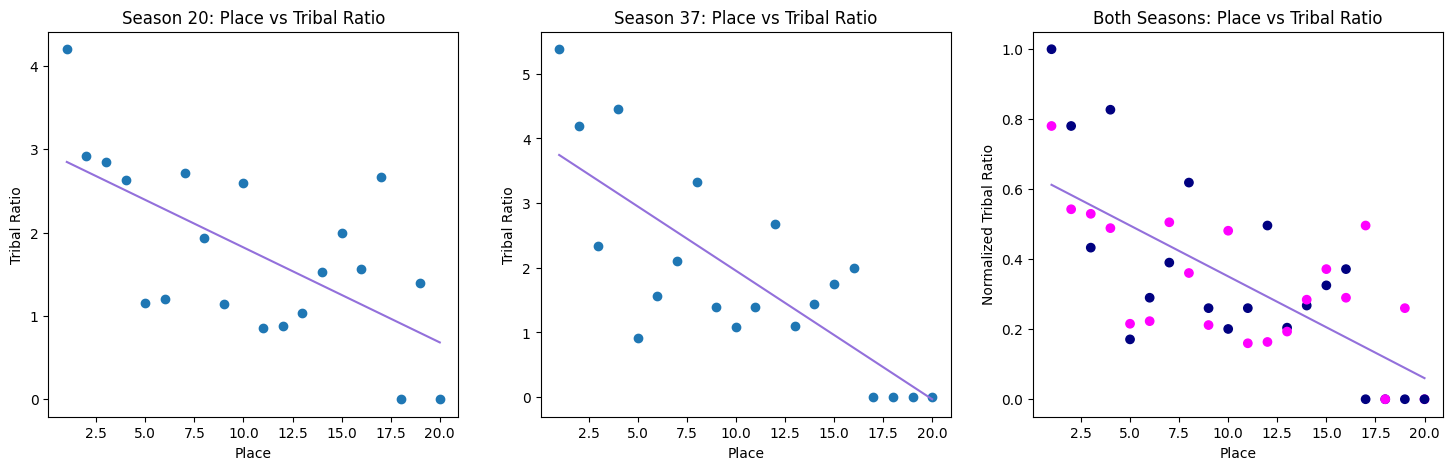

In [397]:
figure, (axis1, axis2, axis3) = plt.subplots(1,3) 
figure.set_size_inches(18,5)
# season 20 tribal ratios with regression line
x=scoring_data_20['Place']
y=scoring_data_20['TribalRatio']
axis1.scatter(x, y)
m, b = np.polyfit(x, y, 1)
axis1.plot(x, m*np.array(x)+b, 'mediumpurple')
axis1.set_title('Season 20: Place vs Tribal Ratio')
axis1.set_xlabel('Place')
axis1.set_ylabel('Tribal Ratio')
print('S20 Slope: ' + str(m))

# season 37 tribal ratios with regression line
x=scoring_data_37['Place']
y=scoring_data_37['TribalRatio']
axis2.scatter(x, y)
m, b = np.polyfit(x, y, 1)
axis2.plot(x, m*np.array(x)+b, 'mediumpurple')
axis2.set_title('Season 37: Place vs Tribal Ratio')
axis2.set_xlabel('Place')
axis2.set_ylabel('Tribal Ratio')
print('S37 Slope: ' + str(m))

# both seasons tribal ratios with regression line
mini = float(combined_seasons['TribalRatio'].min())
maxi = float(combined_seasons['TribalRatio'].max())
combined_seasons['TribalRatio Normalized'] = combined_seasons['TribalRatio'].apply(lambda x: (float(x)-mini)/(maxi-mini))
normal_y = combined_seasons['TribalRatio Normalized']
x = combined_seasons['Place']
axis3.scatter(x, normal_y, color=col3)
m, b = np.polyfit(x, normal_y, 1)
axis3.plot(x, m*np.array(x)+b, 'mediumpurple')
axis3.set_title('Both Seasons: Place vs Tribal Ratio')
axis3.set_xlabel('Place')
axis3.set_ylabel('Normalized Tribal Ratio')
print('Overall slope (normalized): ' + str(m))


And lastly, let's do the same with our other categories we were considering investigating. We will normalize these plots as well so we can easily compare these to the results from tribal council ratio.

Survival Average Slope (normalized): -0.028428187256462328
Challenge Win % Slope (normalized): 0.009669743980203671
Ranking Slope (normalized): 0.02895614260066683


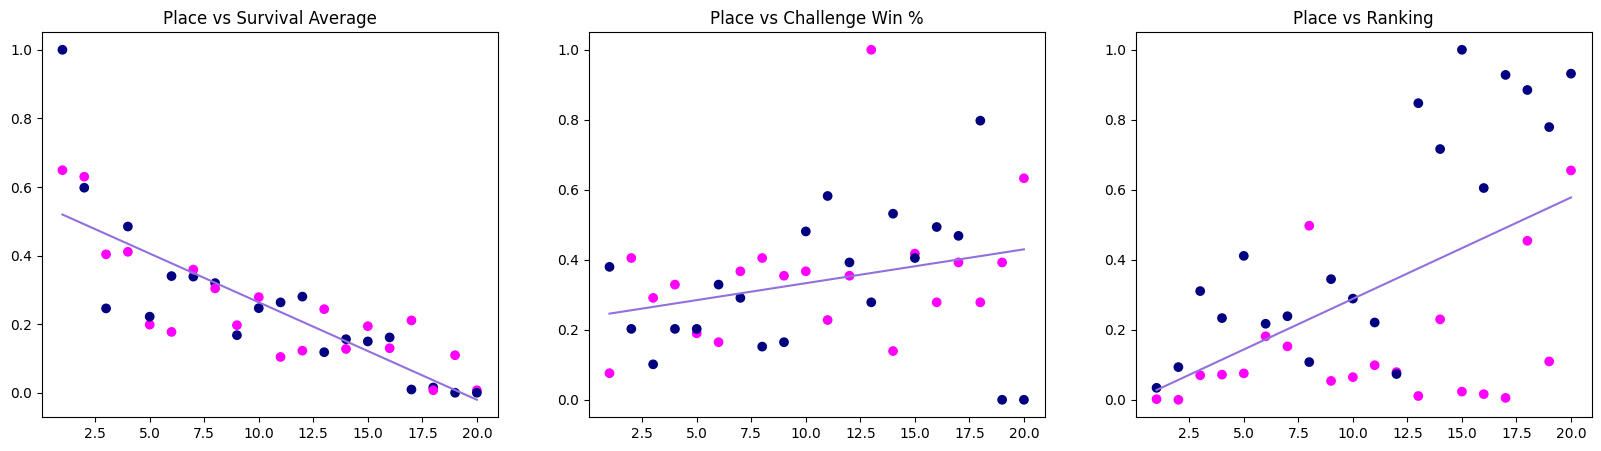

In [398]:
figure, (axis1, axis2, axis3) = plt.subplots(1,3) 
figure.set_size_inches(20,5)
# plot for survival average with regression line
mini = float(combined_seasons['Survival Average'].min())
maxi = float(combined_seasons['Survival Average'].max())
combined_seasons['Survival Average Normalized'] = combined_seasons['Survival Average'].apply(lambda x: (float(x)-mini)/(maxi-mini))
normal_y = combined_seasons['Survival Average Normalized']
axis1.scatter(x, normal_y, color=col3)
m, b = np.polyfit(x, normal_y, 1)
axis1.plot(x, m*np.array(x)+b, 'mediumpurple')
axis1.set_title('Place vs Survival Average')
print('Survival Average Slope (normalized): ' + str(m))

# plot for challenge win percents with regression line
mini = float(combined_seasons['Challenge Win %'].min())
maxi = float(combined_seasons['Challenge Win %'].max())
combined_seasons['Challenge Win % Normalized'] = combined_seasons['Challenge Win %'].apply(lambda x: (float(x)-mini)/(maxi-mini))
normal_y = combined_seasons['Challenge Win % Normalized']
axis2.scatter(x, normal_y, color=col3)
m, b = np.polyfit(x, normal_y, 1)
axis2.plot(x, m*np.array(x)+b, 'mediumpurple')
axis2.set_title('Place vs Challenge Win %')
print('Challenge Win % Slope (normalized): ' + str(m))

# plot for rankings with regression line
mini = float(combined_seasons['Ranking'].min())
maxi = float(combined_seasons['Ranking'].max())
combined_seasons['Ranking Normalized'] = combined_seasons['Ranking'].apply(lambda x: (float(x)-mini)/(maxi-mini))
normal_y = combined_seasons['Ranking Normalized']
axis3.scatter(x, normal_y, color=col3)
m, b = np.polyfit(x, normal_y, 1)
axis3.plot(x, m*np.array(x)+b, 'mediumpurple')
axis3.set_title('Place vs Ranking')
print('Ranking Slope (normalized): ' + str(m))

Insights Learned

After our hypothesis testing and machine learning, we are able to successfully reject the null hypothesis. After using OLS to get a linear regression model of the tribal council ratio vs place in the game, we saw there was a correlation that existed between the two. This means the better ones tribal council ratio is, the better they will place in the game. We see a similar situation with survival average and ranking, however the tribal council ratio was proven to be the most important based on our data. 

An insight that was unexpected was there was little to no correlation between place in the game and challenge win %. To be fair, this data could be skewed because it is a percent, so people who get voted out early on can still have a higher %. Yet, it is still somewhat unexpected that how well they do in the game is independent of challenge performance, since this is commonly considered to be one of the most important aspects of the game.

Conclusion

Tribal Council Ratio is calculated using a formula that includes votes for the bootee, votes against the player, and tribal council appearances. Each of these aspects combined make up the most important factor for how a player will place in the game of Survivor. While there are other aspects of the game that are important, such as winning challenges and suviving around camp, our data shows the tribal council performance outweighs the other aspects of the game. Therefore, we can conclude that a persons social/strategic game is more important than their physical game. The players who are able to be involved in the correct vote, avoid receiving votes, and have to attend less tribals are the most successful in the game, which all comes down to their strategic and social gameplay. From this, one can conclude to make it further in the game they must have a high tribal council ratio, which comes from having strong social and strategic gameplay. To make an extension to life, one might also say you must focus on your social surroundings and be a part of them in order to succeed.

If you are interested in learning more about the evolution of Survivor over time, see the following links:

https://insidesurvivor.com/the-different-eras-of-survivor-42297 

https://foothilldragonpress.org/274442/a-latest/survivor-the-evolution-of-the-20-year-old-survival-reality-tv-show/ 

https://edspace.american.edu/atrium/portfolio-item/dannenberg-houlton-the-evolution-of-survivor-gameplay-norms/